### Import Libraries 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats

!pip install geopandas


import warnings 
warnings.filterwarnings("ignore")

### Import first Dataset for project
#### Household_Income2021

In [2]:
# Read csv file into a pandas dataframe
df1 = pd.read_csv("Household_Income2021.csv")

In [3]:
df1.head()

,Statistic Label,Year,County,UNIT,VALUE
0,Compensation of Employees (i.e. Wages and Sala...,2021,Ireland,Euro Million,110894.16
1,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Carlow,Euro Million,1169.88
2,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Cavan,Euro Million,1338.61
3,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Clare,Euro Million,2386.89
4,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Cork,Euro Million,12864.31


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  486 non-null    object 
 1   Year             486 non-null    int64  
 2   County           486 non-null    object 
 3   UNIT             486 non-null    object 
 4   VALUE            486 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.1+ KB


In [5]:
unique_values = df1['Statistic Label'].unique()

# Print the unique values
print(unique_values)

["Compensation of Employees (i.e. Wages and Salaries, Benefits in kind, Employers' social insurance contribution)"
 'Income of Self Employed'
 'Rent of dwellings (including imputed rent of owner-occupied dwellings)'
 'Net Interest and Dividends (payments by households of interest are deducted from interest received by households)'
 'Primary Income' 'Social Benefits and Other Current Transfers'
 'Total Household Income' 'Total Income per Person'
 'Index of Total Income per Person' 'Current Taxes on Income'
 'Disposable Household Income' 'Disposable Income per Person'
 'Index of Disposable Income per Person'
 'Disposable Income per Person (excluding Rent)'
 'Index of Disposable Income per Person (excluding Rent)'
 'Social Benefits and Other Current Transfers per Person'
 'Persons at Work' 'Percentage of Persons at Work']


In [6]:
# Basic EDA 

df1.shape

(486, 5)

In [7]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  486 non-null    object 
 1   Year             486 non-null    int64  
 2   County           486 non-null    object 
 3   UNIT             486 non-null    object 
 4   VALUE            486 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.1+ KB


In [8]:
df1.describe()


,Year,VALUE
count,486.0,486.000000
mean,2021.0,7363.131667
std,0.0,16075.126284
min,2021.0,0.550000
25%,2021.0,99.700000
50%,2021.0,962.120000
75%,2021.0,7043.987500
max,2021.0,180057.810000


In [9]:
df1.isnull().sum()

Statistic Label    0
Year               0
County             0
UNIT               0
VALUE              0
dtype: int64

In [10]:
# Keep only columns we want 

df1 = df1[df1['Statistic Label'] == 'Total Household Income']


In [11]:
#Rename columns to better explain data

df1.rename(columns={'VALUE': 'Household Income (million EUR)'}, inplace=True)

In [12]:
df1.head()

,Statistic Label,Year,County,UNIT,Household Income (million EUR)
162,Total Household Income,2021,Ireland,Euro Million,180057.81
163,Total Household Income,2021,Co. Carlow,Euro Million,2032.30
164,Total Household Income,2021,Co. Cavan,Euro Million,2333.79
165,Total Household Income,2021,Co. Clare,Euro Million,3892.75
166,Total Household Income,2021,Co. Cork,Euro Million,20711.12


In [13]:
# Drop redundant columns 

df1.drop(columns=['Statistic Label', 'UNIT'], inplace=True)

In [14]:
df1.head()

,Year,County,Household Income (million EUR)
162,2021,Ireland,180057.81
163,2021,Co. Carlow,2032.30
164,2021,Co. Cavan,2333.79
165,2021,Co. Clare,3892.75
166,2021,Co. Cork,20711.12


In [15]:
#Re-import full dataset

df2 = pd.read_csv("Household_Income2021.csv")

In [16]:
# Keep only columns we want 

df2 = df2[df2['Statistic Label'] == 'Percentage of Persons at Work']

In [17]:
#Rename columns to better explain data

df2.rename(columns={'VALUE': 'Persons at Work (%)'}, inplace=True)

In [18]:
# Drop redundant columns 

df2.drop(columns=['Statistic Label', 'UNIT'], inplace=True)

In [19]:
df2.head()

,Year,County,Persons at Work (%)
459,2021,Ireland,100.00
460,2021,Co. Carlow,0.88
461,2021,Co. Cavan,1.53
462,2021,Co. Clare,1.12
463,2021,Co. Cork,12.83


In [20]:
#Re-import full dataset

df3 = pd.read_csv("Household_Income2021.csv")

In [21]:
# Keep only rows we want 

df3 = df3[df3['Statistic Label'] == 'Disposable Income per Person']

In [22]:
#Rename columns to better explain data

df3.rename(columns={'VALUE': 'Disposable Income (pp)'}, inplace=True)

In [23]:
df3.head()

,Statistic Label,Year,County,UNIT,Disposable Income (pp)
297,Disposable Income per Person,2021,Ireland,Euro,24376.10
298,Disposable Income per Person,2021,Co. Carlow,Euro,24606.46
299,Disposable Income per Person,2021,Co. Cavan,Euro,21096.88
300,Disposable Income per Person,2021,Co. Clare,Euro,21834.88
301,Disposable Income per Person,2021,Co. Cork,Euro,24599.56


In [24]:
# Drop redundant columns 

df3.drop(columns=['Statistic Label', 'UNIT'], inplace=True)

In [25]:
df3.head()

,Year,County,Disposable Income (pp)
297,2021,Ireland,24376.10
298,2021,Co. Carlow,24606.46
299,2021,Co. Cavan,21096.88
300,2021,Co. Clare,21834.88
301,2021,Co. Cork,24599.56


In [26]:
#Merge three individual dataframes that were filtered and edited above

# Merge df1 and df2 on 'County' column
df = pd.merge(df1, df2, on='County', how='inner')

# Merge df and df3 on'County' common column
df = pd.merge(df, df3, on='County', how='inner')


In [27]:
df.head()

,Year_x,County,Household Income (million EUR),Year_y,Persons at Work (%),Year,Disposable Income (pp)
0,2021,Ireland,180057.81,2021,100.00,2021,24376.10
1,2021,Co. Carlow,2032.30,2021,0.88,2021,24606.46
2,2021,Co. Cavan,2333.79,2021,1.53,2021,21096.88
3,2021,Co. Clare,3892.75,2021,1.12,2021,21834.88
4,2021,Co. Cork,20711.12,2021,12.83,2021,24599.56


In [28]:
# Drop redundant columns (all years are 2021)

df.drop(columns=['Year_x', 'Year_y', 'Year'], inplace=True)

In [29]:
df.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp)
0,Ireland,180057.81,100.00,24376.10
1,Co. Carlow,2032.30,0.88,24606.46
2,Co. Cavan,2333.79,1.53,21096.88
3,Co. Clare,3892.75,1.12,21834.88
4,Co. Cork,20711.12,12.83,24599.56


In [30]:
df.shape

(27, 4)

In [31]:
# Import Activities Dataframe

df4 = pd.read_csv("Activities2021.csv")

In [32]:
#Basic exploration of data frame

df4.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Bella & Brava Restaurant,https://bellabravarestaurant.com/,353719306727,-8.605609,54.171017,Sligo,Coolaney,Ireland,"Food and Drink,Restaurant,Local Produce"
1,The Adventure Islands,https://www.theadventureisland.com/,353862518252,-9.630803,53.827844,Mayo,Westport,Ireland,"Kayaking,Activity Operator,Walking,Day Tour,To..."
2,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,NaN,Ireland,"Traditionally Irish,Venue,Music"
3,Kilclooney Wood,http://www.coillte.ie,NaN,-7.426484,52.203447,Waterford,Kilmacthomas,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
4,The Ring of Kerry Cycle Route,NaN,+353(0)646631633,-9.750439,52.167083,Kerry,NaN,Republic of Ireland,Cycling


In [33]:
df4.shape

(6107, 9)

In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6107 non-null   object 
 1   Url              5681 non-null   object 
 2   Telephone        5230 non-null   object 
 3   Longitude        6107 non-null   float64
 4   Latitude         6107 non-null   float64
 5   AddressRegion    6107 non-null   object 
 6   AddressLocality  5996 non-null   object 
 7   AddressCountry   6107 non-null   object 
 8   Tags             5949 non-null   object 
dtypes: float64(2), object(7)
memory usage: 429.5+ KB


In [35]:
df4.isnull().sum()

Name                 0
Url                426
Telephone          877
Longitude            0
Latitude             0
AddressRegion        0
AddressLocality    111
AddressCountry       0
Tags               158
dtype: int64

In [36]:
# Get sum counts of individual activities for each County

county_counts = df4['AddressRegion'].value_counts()

print(county_counts)

AddressRegion
Dublin       1140
Cork          653
Kerry         535
Galway        504
Donegal       391
Mayo          336
Clare         324
Waterford     215
Wicklow       200
Wexford       192
Sligo         191
Limerick      182
Kilkenny      181
Tipperary     156
Kildare       133
Meath         123
Louth         104
Westmeath     103
Carlow         76
Offaly         69
Roscommon      66
Laois          57
Cavan          55
Leitrim        53
Monaghan       41
Longford       27
Name: count, dtype: int64


In [37]:
# Create new df with the sum of activites per County

# Create DataFrame from county_counts Series
df5 = pd.DataFrame({'AddressRegion': county_counts.index, 'Count': county_counts.values})

print(df5)

   AddressRegion  Count
0         Dublin   1140
1           Cork    653
2          Kerry    535
3         Galway    504
4        Donegal    391
5           Mayo    336
6          Clare    324
7      Waterford    215
8        Wicklow    200
9        Wexford    192
10         Sligo    191
11      Limerick    182
12      Kilkenny    181
13     Tipperary    156
14       Kildare    133
15         Meath    123
16         Louth    104
17     Westmeath    103
18        Carlow     76
19        Offaly     69
20     Roscommon     66
21         Laois     57
22         Cavan     55
23       Leitrim     53
24      Monaghan     41
25      Longford     27


In [38]:
# Add a new row entry to include a column with sum of all counts for 'Ireland'

# Calculate the sum of all counts
total_count = df5['Count'].sum()

# Create new DataFrame for 'Ireland' with the total count
ireland_row = pd.DataFrame({'AddressRegion': ['Ireland'], 'Count': [total_count]})

# Concatenate df5 and ireland_row
df5 = pd.concat([df5, ireland_row], ignore_index=True)

print(df5)

   AddressRegion  Count
0         Dublin   1140
1           Cork    653
2          Kerry    535
3         Galway    504
4        Donegal    391
5           Mayo    336
6          Clare    324
7      Waterford    215
8        Wicklow    200
9        Wexford    192
10         Sligo    191
11      Limerick    182
12      Kilkenny    181
13     Tipperary    156
14       Kildare    133
15         Meath    123
16         Louth    104
17     Westmeath    103
18        Carlow     76
19        Offaly     69
20     Roscommon     66
21         Laois     57
22         Cavan     55
23       Leitrim     53
24      Monaghan     41
25      Longford     27
26       Ireland   6107


In [39]:
#Rename columns to better explain data
df5.rename(columns={'AddressRegion': 'County', 'Count': 'Total Activities'}, inplace=True)

df5.head()

,County,Total Activities
0,Dublin,1140
1,Cork,653
2,Kerry,535
3,Galway,504
4,Donegal,391


In [40]:
# Check all 'County' names are the same before df merge

print("Unique values in df['County']: ", df['County'].unique())
print("Unique values in df5['County']: ", df5['County'].unique())


Unique values in df['County']:  ['Ireland' 'Co. Carlow' 'Co. Cavan' 'Co. Clare' 'Co. Cork' 'Co. Donegal'
 'Co. Dublin' 'Co. Galway' 'Co. Kerry' 'Co. Kildare' 'Co. Kilkenny'
 'Co. Laois' 'Co. Leitrim' 'Co. Limerick' 'Co. Longford' 'Co. Louth'
 'Co. Mayo' 'Co. Meath' 'Co. Monaghan' 'Co. Offaly' 'Co. Roscommon'
 'Co. Sligo' 'Co. Tipperary' 'Co. Waterford' 'Co. Westmeath' 'Co. Wexford'
 'Co. Wicklow']
Unique values in df5['County']:  ['Dublin' 'Cork' 'Kerry' 'Galway' 'Donegal' 'Mayo' 'Clare' 'Waterford'
 'Wicklow' 'Wexford' 'Sligo' 'Limerick' 'Kilkenny' 'Tipperary' 'Kildare'
 'Meath' 'Louth' 'Westmeath' 'Carlow' 'Offaly' 'Roscommon' 'Laois' 'Cavan'
 'Leitrim' 'Monaghan' 'Longford' 'Ireland']


In [41]:
# Remove iconsistencies between two df's to be merged

df['County'] = df['County'].str.replace('Co. ', '')

In [42]:
# Check this has been successful

print("Unique values in df['County']: ", df['County'].unique())
print("Unique values in df5['County']: ", df5['County'].unique())

Unique values in df['County']:  ['Ireland' 'Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Dublin' 'Galway'
 'Kerry' 'Kildare' 'Kilkenny' 'Laois' 'Leitrim' 'Limerick' 'Longford'
 'Louth' 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo'
 'Tipperary' 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']
Unique values in df5['County']:  ['Dublin' 'Cork' 'Kerry' 'Galway' 'Donegal' 'Mayo' 'Clare' 'Waterford'
 'Wicklow' 'Wexford' 'Sligo' 'Limerick' 'Kilkenny' 'Tipperary' 'Kildare'
 'Meath' 'Louth' 'Westmeath' 'Carlow' 'Offaly' 'Roscommon' 'Laois' 'Cavan'
 'Leitrim' 'Monaghan' 'Longford' 'Ireland']


In [43]:
# Merge df and df5 on 'County' column

df = pd.merge(df, df5, on='County', how='inner')

In [44]:
df.shape

(27, 5)

In [45]:
df.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities
0,Ireland,180057.81,100.00,24376.10,6107
1,Carlow,2032.30,0.88,24606.46,76
2,Cavan,2333.79,1.53,21096.88,55
3,Clare,3892.75,1.12,21834.88,324
4,Cork,20711.12,12.83,24599.56,653


In [46]:
# Import Accomodation dataframe

df6 = pd.read_csv("Accommodation2021.csv")

In [47]:
df6.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
1,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
4,Flemings White Bridge Caravan and Camping,http://www.killarneycamping.com,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Republic of Ireland,Camping


In [48]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2337 non-null   object 
 1   Url              2176 non-null   object 
 2   Telephone        2333 non-null   object 
 3   Longitude        2337 non-null   float64
 4   Latitude         2337 non-null   float64
 5   AddressRegion    2337 non-null   object 
 6   AddressLocality  2174 non-null   object 
 7   AddressCountry   2337 non-null   object 
 8   Tags             2337 non-null   object 
dtypes: float64(2), object(7)
memory usage: 164.4+ KB


In [49]:
# Get sum counts of individual activities for each County
county_counts2 = df6['AddressRegion'].value_counts()

# Create new df with the sum of accomodation per County
df6 = pd.DataFrame({'AddressRegion': county_counts2.index, 'Count': county_counts2.values})

# Calculate the sum of all counts
total_count = df6['Count'].sum()

# Create a new DataFrame for 'Ireland' with the total count
ireland_row = pd.DataFrame({'AddressRegion': ['Ireland'], 'Count': [total_count]})

# Concatenate df5 and ireland_row
df6 = pd.concat([df6, ireland_row], ignore_index=True)

df6.head()

,AddressRegion,Count
0,Kerry,308
1,Cork,252
2,Galway,243
3,Dublin,234
4,Donegal,176


In [50]:
#Rename columns to better explain data
df6.rename(columns={'AddressRegion': 'County', 'Count': 'Total Accommodation'}, inplace=True)

df6.head()

,County,Total Accommodation
0,Kerry,308
1,Cork,252
2,Galway,243
3,Dublin,234
4,Donegal,176


In [51]:
# Merge df and df6 on another common column

df = pd.merge(df, df6, on='County', how='inner')

In [52]:
df.head(5)

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation
0,Ireland,180057.81,100.00,24376.10,6107,2337
1,Carlow,2032.30,0.88,24606.46,76,21
2,Cavan,2333.79,1.53,21096.88,55,41
3,Clare,3892.75,1.12,21834.88,324,156
4,Cork,20711.12,12.83,24599.56,653,252


In [53]:
df.shape

(27, 6)

In [54]:
# Import Attractions Dataframe

df7 = pd.read_csv("Attractions2021.csv")

In [55]:
df7.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Dun na Rí Forest Park,http://www.coillte.ie/site/dun-a-ri-forest-park/,353494331942,-6.792661,53.918978,Cavan,Kingscourt,Ireland,"Walking,Forest Park,Park and Forest Walk,Natio..."
1,Newcastle Woods,https://www.longford.ie/en/visit/trails/newcas...,353433343509,-7.726107,53.562124,Longford,NaN,Ireland,"Walking,Natural Landscape"
2,Rinn Duin Castle Loop,https://www.sportireland.ie/outdoors/walking/t...,+353(0)906630252,-8.004326,53.544197,Roscommon,NaN,Republic of Ireland,"Walking,Castle,Historic Houses and Castle,Ruins"
3,Knock Museum,https://www.knockshrine.ie/key-places-to-visit...,353949388100,-8.917153,53.790004,Mayo,Knock,Ireland,"Church Abbey,Monastery,Churches,Abbeys and Mon..."
4,Michael J Quill Centre,http://www.historic-ireland.com/places/778.html,353646685511,-9.461430,51.902656,Kerry,Kilgarvan,Republic of Ireland,Museums and Attraction


In [56]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             183 non-null    object 
 1   Url              139 non-null    object 
 2   Telephone        130 non-null    object 
 3   Longitude        183 non-null    float64
 4   Latitude         183 non-null    float64
 5   AddressRegion    183 non-null    object 
 6   AddressLocality  120 non-null    object 
 7   AddressCountry   183 non-null    object 
 8   Tags             183 non-null    object 
dtypes: float64(2), object(7)
memory usage: 13.0+ KB


In [57]:
# Get sum counts of individual attractions for each County
county_counts3 = df7['AddressRegion'].value_counts()

# Create new df with the sum of accomodation per County
df7 = pd.DataFrame({'AddressRegion': county_counts3.index, 'Count': county_counts3.values})

# Calculate the sum of all counts
total_count = df7['Count'].sum()

# Create a new DataFrame for 'Ireland' with the total count
ireland_row = pd.DataFrame({'AddressRegion': ['Ireland'], 'Count': [total_count]})

# Concatenate df5 and ireland_row
df7 = pd.concat([df7, ireland_row], ignore_index=True)

df7.head()

,AddressRegion,Count
0,Kerry,33
1,Cork,26
2,Galway,14
3,Mayo,14
4,Wexford,10


In [58]:
#Rename columns to better explain data
df7.rename(columns={'AddressRegion': 'County', 'Count': 'Total Attractions'}, inplace=True)

df7.head()

,County,Total Attractions
0,Kerry,33
1,Cork,26
2,Galway,14
3,Mayo,14
4,Wexford,10


In [59]:
df7.shape

(25, 2)

In [60]:
df.shape

(27, 6)

In [61]:
# We can see from the above that we are missing two 'County' entries so we must identify these before manually imputing these 
# missing values

print("Unique values in df['County']: ", df['County'].unique())
print("Unique values in df7['County']: ", df5['County'].unique())

Unique values in df['County']:  ['Ireland' 'Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Dublin' 'Galway'
 'Kerry' 'Kildare' 'Kilkenny' 'Laois' 'Leitrim' 'Limerick' 'Longford'
 'Louth' 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo'
 'Tipperary' 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']
Unique values in df7['County']:  ['Dublin' 'Cork' 'Kerry' 'Galway' 'Donegal' 'Mayo' 'Clare' 'Waterford'
 'Wicklow' 'Wexford' 'Sligo' 'Limerick' 'Kilkenny' 'Tipperary' 'Kildare'
 'Meath' 'Louth' 'Westmeath' 'Carlow' 'Offaly' 'Roscommon' 'Laois' 'Cavan'
 'Leitrim' 'Monaghan' 'Longford' 'Ireland']


In [62]:
# Find missing values in df7 compared to df

missing_counties = set(df['County']) - set(df7['County'])

print("Missing counties in df7 that are in df:")
for county in missing_counties:
    print(county)

Missing counties in df7 that are in df:
Monaghan
Offaly


In [63]:
# Create temporary df with the missing entries
new_entries = pd.DataFrame({'County': ['Offaly', 'Monaghan'], 'Total Attractions': [0, 0]})

# Concatenate df7 and temp df
df7 = pd.concat([df7, new_entries], ignore_index=True)

print(df7)

       County  Total Attractions
0       Kerry                 33
1        Cork                 26
2      Galway                 14
3        Mayo                 14
4     Wexford                 10
5       Sligo                  8
6   Waterford                  8
7       Louth                  7
8    Limerick                  7
9     Donegal                  7
10  Tipperary                  7
11   Kilkenny                  5
12      Meath                  5
13      Clare                  5
14      Laois                  4
15     Carlow                  4
16    Kildare                  4
17   Longford                  3
18    Leitrim                  3
19      Cavan                  3
20    Wicklow                  2
21  Roscommon                  2
22     Dublin                  1
23  Westmeath                  1
24    Ireland                183
25     Offaly                  0
26   Monaghan                  0


In [64]:
df7.shape

(27, 2)

In [65]:
# Merge df and df6 on another common column

df = pd.merge(df, df7, on='County', how='inner')

In [66]:
df.shape

(27, 7)

### Exploratory Data Analysis

In [67]:
df.head()


,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions
0,Ireland,180057.81,100.00,24376.10,6107,2337,183
1,Carlow,2032.30,0.88,24606.46,76,21,4
2,Cavan,2333.79,1.53,21096.88,55,41,3
3,Clare,3892.75,1.12,21834.88,324,156,5
4,Cork,20711.12,12.83,24599.56,653,252,26


In [68]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   County                          27 non-null     object 
 1   Household Income (million EUR)  27 non-null     float64
 2   Persons at Work (%)             27 non-null     float64
 3   Disposable Income (pp)          27 non-null     float64
 4   Total Activities                27 non-null     int64  
 5   Total Accommodation             27 non-null     int64  
 6   Total Attractions               27 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.6+ KB


In [69]:
df.describe()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions
count,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000
mean,13337.615185,7.407407,22690.948148,452.37037,173.111111,13.555556
std,35298.214552,19.420785,2017.139860,1155.88162,440.463771,34.679115
min,980.930000,0.550000,19252.820000,27.00000,8.000000,0.000000
25%,2346.945000,1.380000,21187.975000,72.50000,34.500000,3.000000
50%,4134.700000,2.020000,22542.760000,181.00000,57.000000,5.000000
75%,6326.960000,3.740000,24225.585000,330.00000,149.500000,8.000000
max,180057.810000,100.000000,27958.060000,6107.00000,2337.000000,183.000000


In [70]:
df.describe(include="object")

,County
count,27
unique,27
top,Ireland
freq,1


In [71]:
# Save current df (including Ireland col) into a new df 

df_all = df.copy()

In [72]:
# Drop Ireland 'Total' column from our durrent df

df = df[df['County'] != 'Ireland']

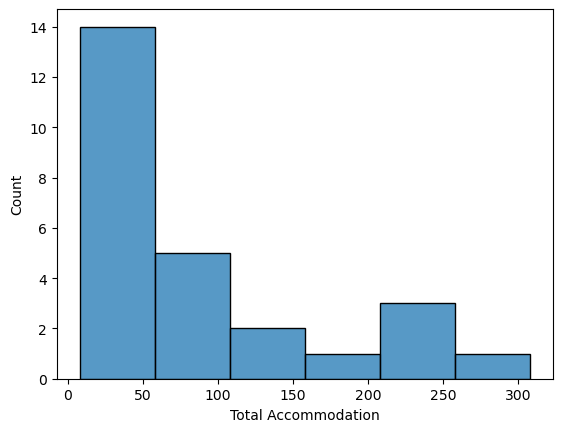

In [73]:
# Plot a histogram to see the spread of Accomodation across Counties

sns.histplot(data=df, x="Total Accommodation");

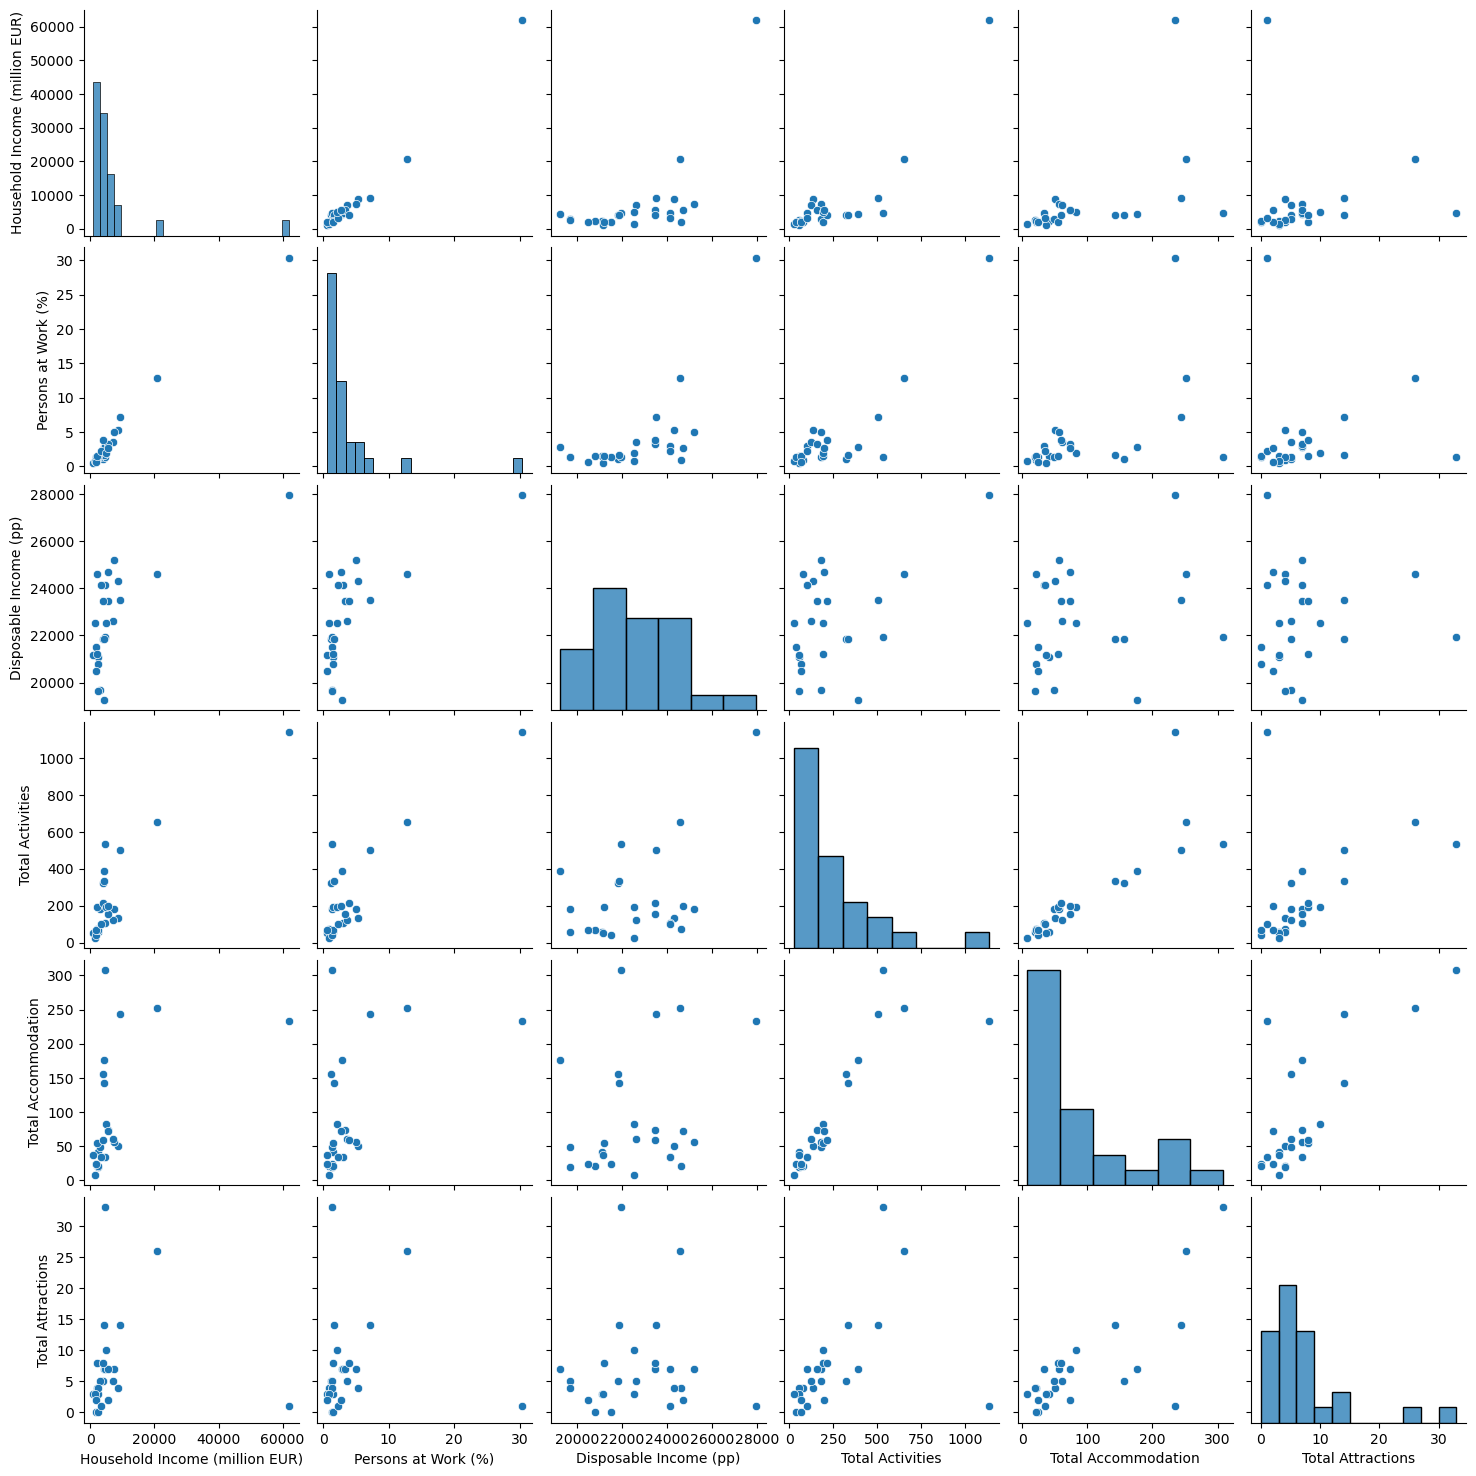

In [74]:
# Visualize pairwise relationships between numerical variables


sns.pairplot(df)

In [75]:
df.to_csv('df_merged.csv', index=False)

## Statistics Questions 

### 1. Data Summarisation


In [76]:
# Read csv file into a pandas dataframe
df = pd.read_csv("df_merged.csv")

In [77]:
# Get central tendencies of data

df.describe()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6925.300000,3.846154,22626.134615,234.884615,89.884615,7.038462
std,11883.395002,6.010675,2028.213265,247.627353,85.254596,7.623547
min,980.930000,0.550000,19252.820000,27.000000,8.000000,0.000000
25%,2340.367500,1.380000,21178.392500,70.750000,34.250000,3.000000
50%,4093.015000,1.830000,22535.025000,168.500000,56.000000,5.000000
75%,5575.495000,3.530000,24146.982500,296.750000,127.750000,7.750000
max,61920.180000,30.420000,27958.060000,1140.000000,308.000000,33.000000


In [78]:
# Exclude object column
col_exclude = ['County']  
num_cols = df.drop(columns=col_exclude).select_dtypes(include=['number'])

In [79]:
# Get mean of numerical columns 

mean_values = num_cols.mean()

# Print title
print("Mean of Numerical Columns")
print("------------")  

# Print results
print(mean_values)

Mean of Numerical Columns
------------
Household Income (million EUR)     6925.300000
Persons at Work (%)                   3.846154
Disposable Income (pp)            22626.134615
Total Activities                    234.884615
Total Accommodation                  89.884615
Total Attractions                     7.038462
dtype: float64


In [80]:
# Get mode of numerical columns 

mode_values = num_cols.mode()

# Print title
print("Mode of Numerical Columns")
print("------------")  

# Print results
print(mode_values)

Mode of Numerical Columns
------------
    Household Income (million EUR)  Persons at Work (%)  \
0                           980.93                 1.38   
1                          1325.33                 1.53   
2                          1894.20                  NaN   
3                          1937.74                  NaN   
4                          2032.30                  NaN   
5                          2055.02                  NaN   
6                          2333.79                  NaN   
7                          2360.10                  NaN   
8                          2479.65                  NaN   
9                          2926.90                  NaN   
10                         3199.79                  NaN   
11                         3892.75                  NaN   
12                         4051.33                  NaN   
13                         4134.70                  NaN   
14                         4242.44                  NaN   
15               

In [81]:
# Get median of numerical columns 

med_values = num_cols.median()

# Print title
print("Median of Numerical Columns")
print("------------")  

# Print results
print(med_values)

Median of Numerical Columns
------------
Household Income (million EUR)     4093.015
Persons at Work (%)                   1.830
Disposable Income (pp)            22535.025
Total Activities                    168.500
Total Accommodation                  56.000
Total Attractions                     5.000
dtype: float64


In [82]:
# Get variance of numerical columns 

variance_values = num_cols.var()

# Print title
print("Variance of Numerical Columns")
print("------------")  

# Print results
print(variance_values)

Variance of Numerical Columns
------------
Household Income (million EUR)    1.412151e+08
Persons at Work (%)               3.612821e+01
Disposable Income (pp)            4.113649e+06
Total Activities                  6.131931e+04
Total Accommodation               7.268346e+03
Total Attractions                 5.811846e+01
dtype: float64


In [83]:
# Get standard deviation of numerical columns 

std_values = num_cols.std()

# Print title
print("Standard Deviation of Numerical Columns")
print("------------")  

# Print results
print(std_values)

Standard Deviation of Numerical Columns
------------
Household Income (million EUR)    11883.395002
Persons at Work (%)                   6.010675
Disposable Income (pp)             2028.213265
Total Activities                    247.627353
Total Accommodation                  85.254596
Total Attractions                     7.623547
dtype: float64


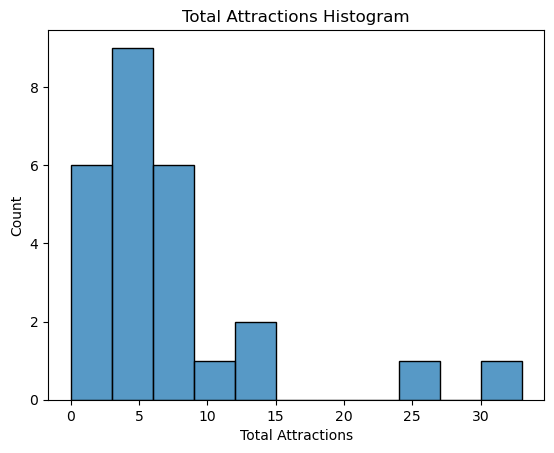

In [84]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Total Attractions")
plt.title('Total Attractions Histogram')
plt.show();

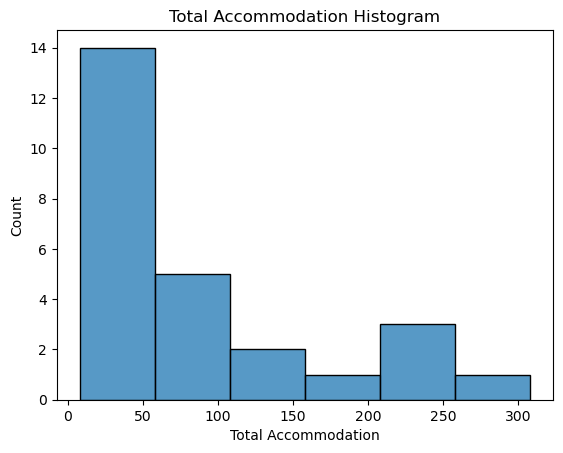

In [85]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Total Accommodation")
plt.title('Total Accommodation Histogram')
plt.show();

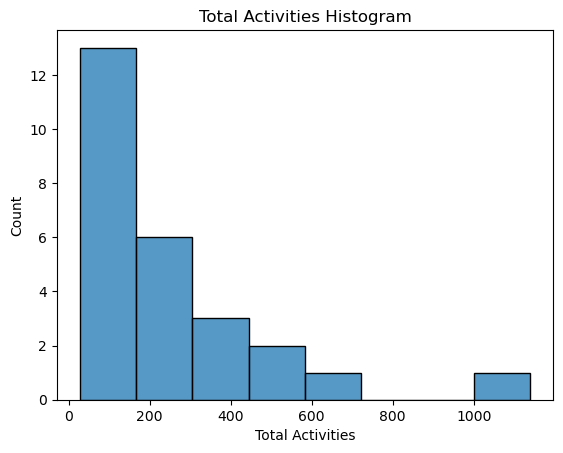

In [86]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Total Activities")
plt.title('Total Activities Histogram')
plt.show();

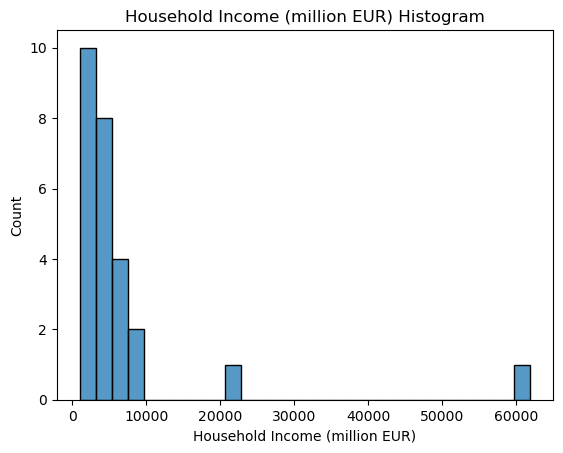

In [87]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Household Income (million EUR)")
plt.title('Household Income (million EUR) Histogram')
plt.show();

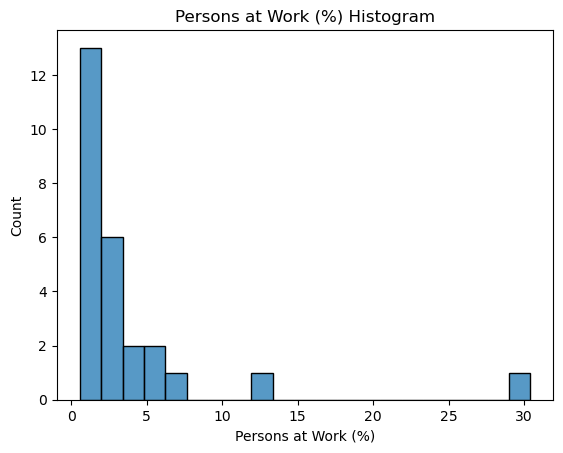

In [88]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Persons at Work (%)")
plt.title('Persons at Work (%) Histogram')
plt.show();

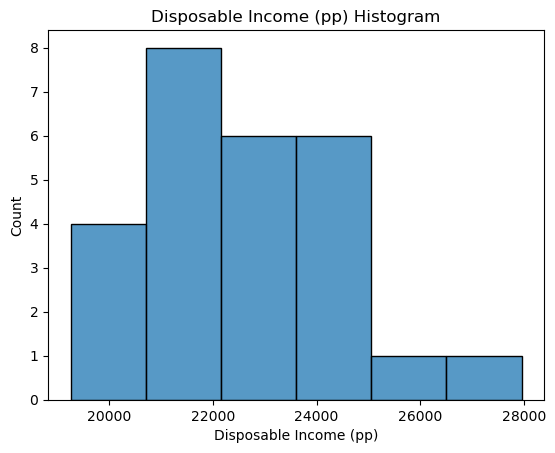

In [89]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Disposable Income (pp)");
plt.title('Disposable Income (pp) Histogram')
plt.show()

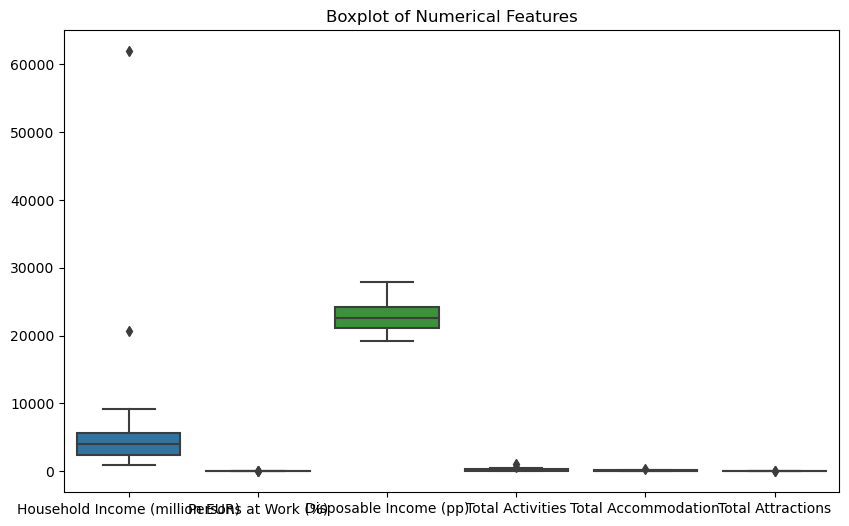

In [90]:
# Boxplots of data

# Plot boxplots for all numerical columns
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title('Boxplot of Numerical Features')
plt.show()

Text(0.5, 1.0, 'Adm Boxplot')

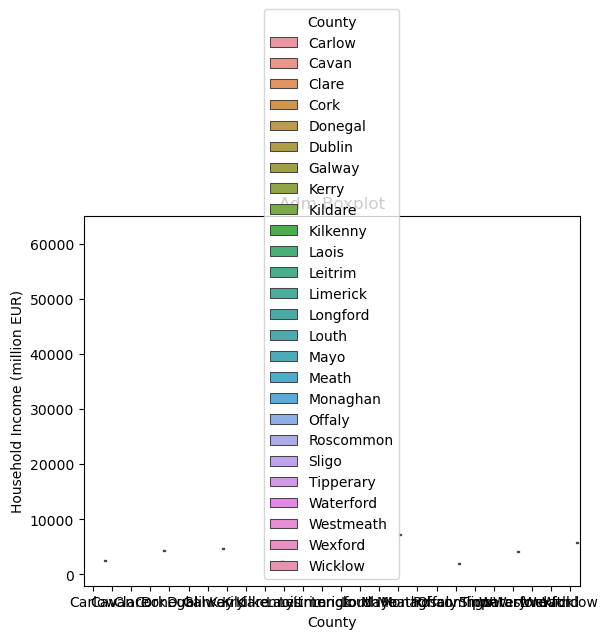

In [91]:
# Boxplots for each county to identidfy outliers 

#We create boxplot to identify outliers

sns.boxplot(x = 'County', y = 'Household Income (million EUR)', data = df, hue='County')
plt.title('Adm Boxplot')

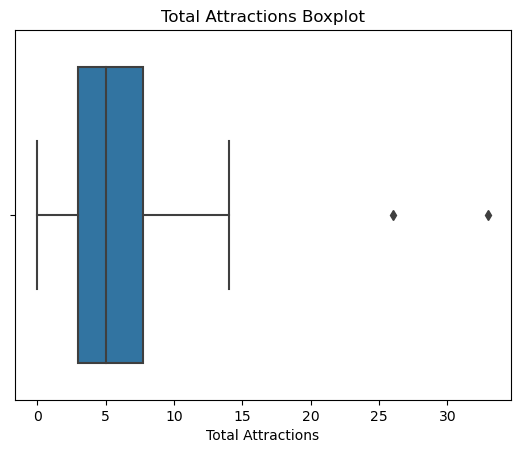

In [92]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Total Attractions")
plt.title('Total Attractions Boxplot')
plt.show();

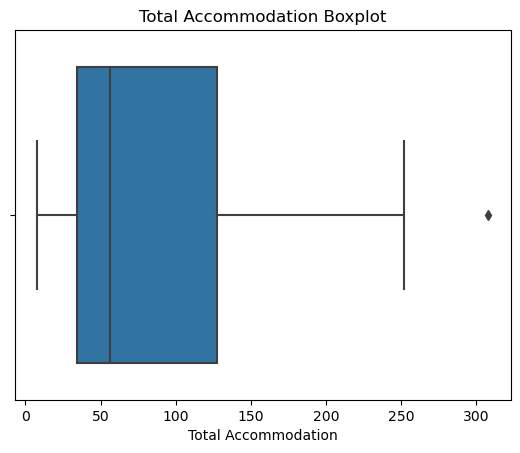

In [93]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Total Accommodation")
plt.title('Total Accommodation Boxplot')
plt.show();

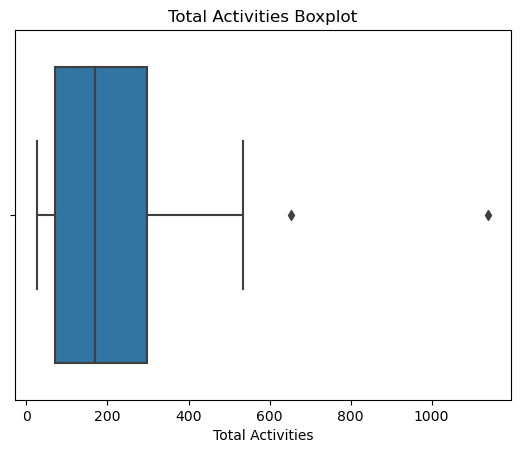

In [94]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Total Activities")
plt.title('Total Activities Boxplot')
plt.show();

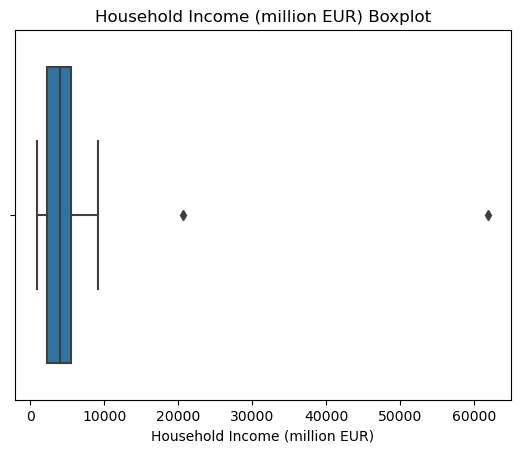

In [95]:
# Plotting individual boxplots

sns.boxplot(data=df, x="Household Income (million EUR)")
plt.title('Household Income (million EUR) Boxplot')
plt.show();

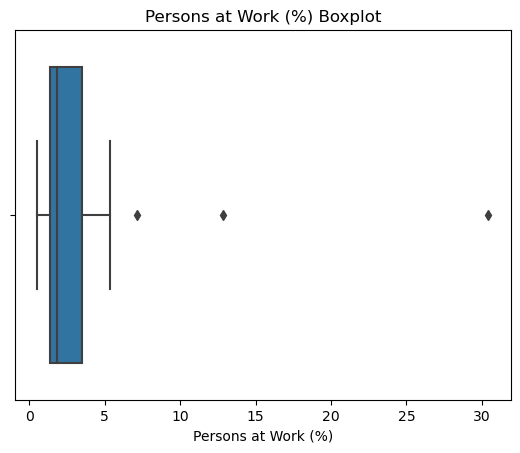

In [96]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Persons at Work (%)")
plt.title('Persons at Work (%) Boxplot')
plt.show();

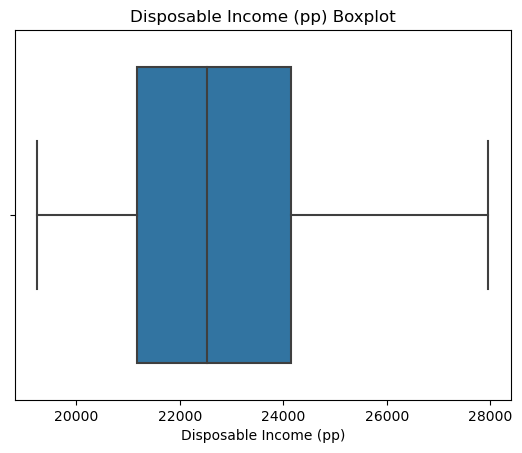

In [97]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Disposable Income (pp)");
plt.title('Disposable Income (pp) Boxplot')
plt.show() 

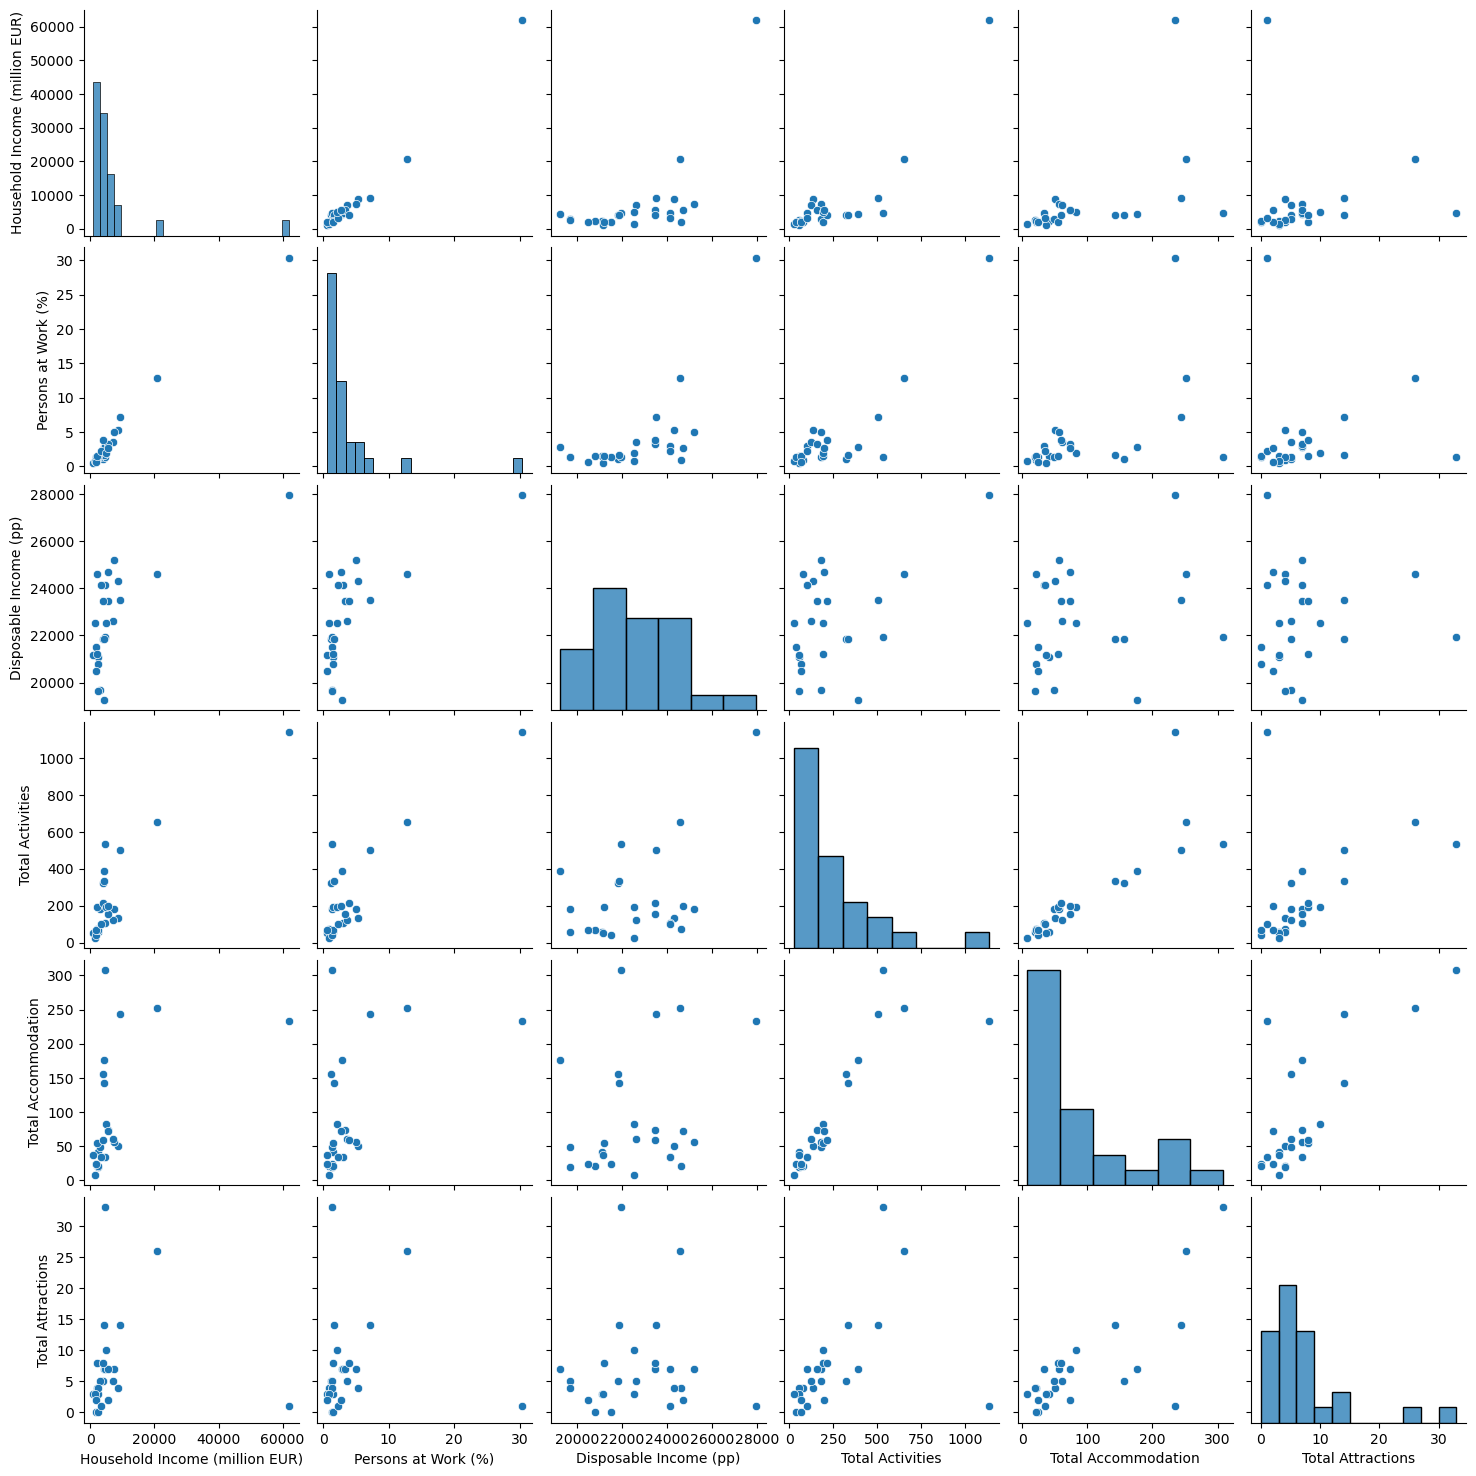

In [98]:
# Plot all features to check for obvious correlations 

sns.pairplot(df)

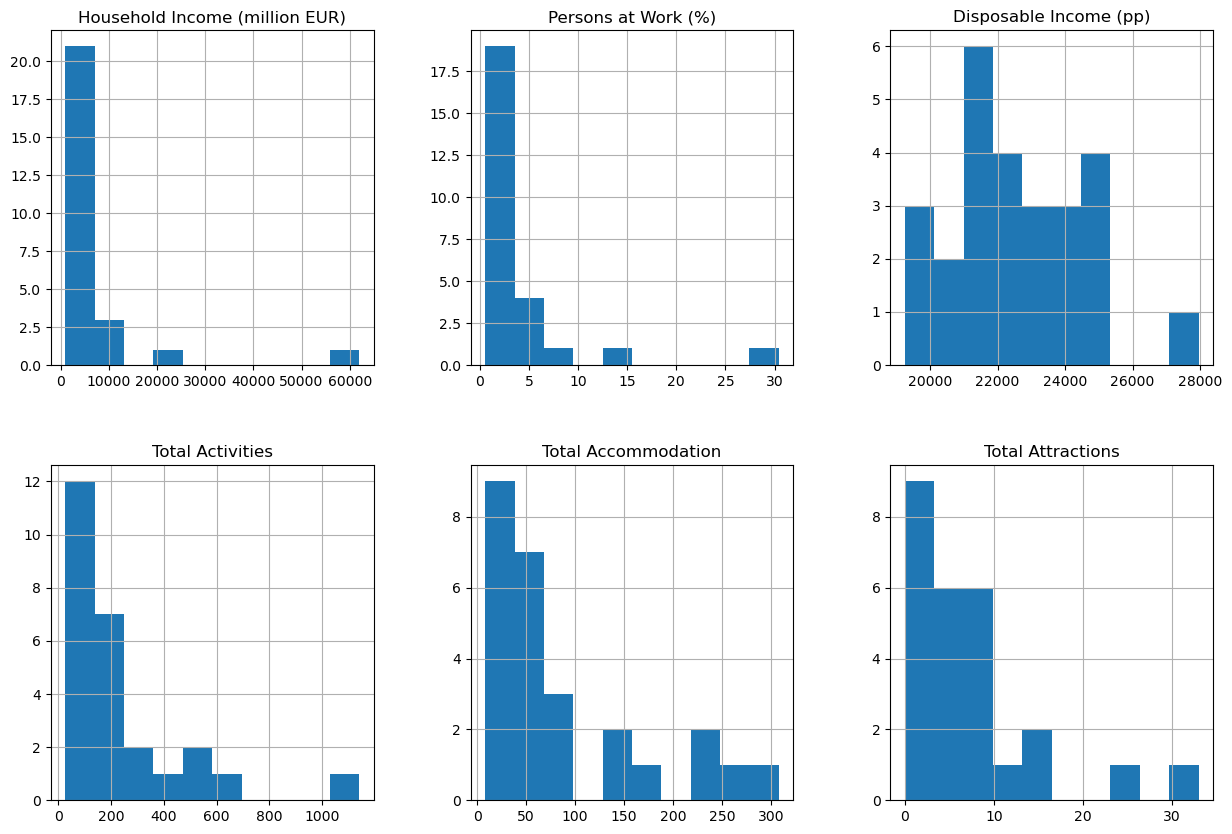

In [99]:
# Select numerical columns from the DataFrame
num_cols = df.select_dtypes(include=['number'])

# Plot histograms for each numerical variable
num_cols.hist(layout=(2, 3), figsize=(15, 10))  # Adjust layout and figsize as needed
plt.show()

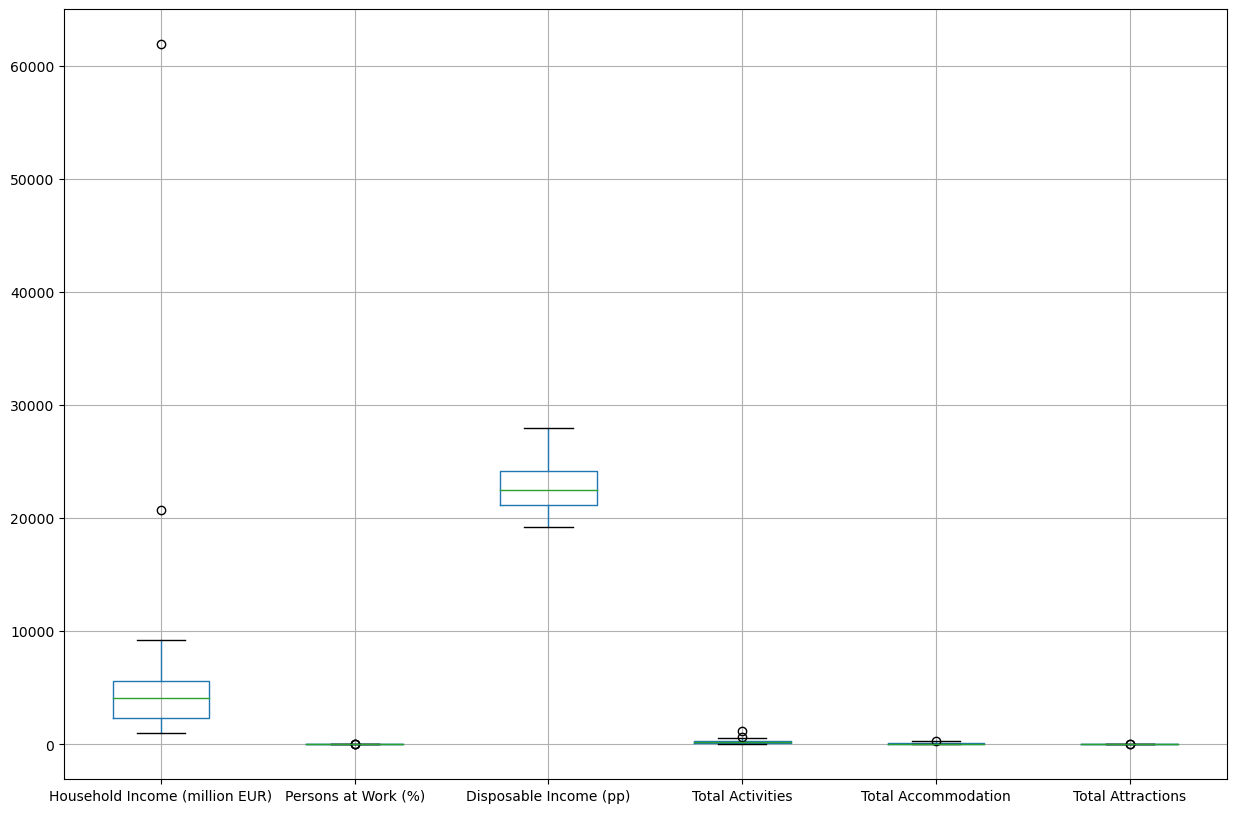

In [100]:
# Select numerical columns from the DataFrame
num_cols = df.select_dtypes(include=['number'])

# Plot box plots for each numerical variable
num_cols.boxplot(figsize=(15, 10))  # Adjust figsize as needed
plt.show()

### 2. Discrete Distribution

In [101]:
###Binomial 

from scipy.stats import binom

In [102]:
### Create a new discrete variable class which will categorise our data into three categories which analyses tourist attractions

In [103]:
#Create discrete variables based on quantile ranges within data for each County

# Calculate quantiles for numerical features
quantiles_activities = df['Total Activities'].quantile([0.33, 0.67])
quantiles_accommodation = df['Total Accommodation'].quantile([0.33, 0.67])
quantiles_attractions = df['Total Attractions'].quantile([0.33, 0.67])

# Assign labels for quantiles
def assign_category(row, quantiles_activities, quantiles_accommodation, quantiles_attractions):
    activity_cat = 'Low' if row['Total Activities'] <= quantiles_activities[0.33] else 'Middle' if row['Total Activities'] <= quantiles_activities[0.67] else 'High'
    accommodation_cat = 'Low' if row['Total Accommodation'] <= quantiles_accommodation[0.33] else 'Middle' if row['Total Accommodation'] <= quantiles_accommodation[0.67] else 'High'
    attractions_cat = 'Low' if row['Total Attractions'] <= quantiles_attractions[0.33] else 'Middle' if row['Total Attractions'] <= quantiles_attractions[0.67] else 'High'
    
    return activity_cat, accommodation_cat, attractions_cat

# Create category columns
df[['Activity Range', 'Accommodation Range', 'Attraction Range']] = df.apply(lambda x: assign_category(x, quantiles_activities, quantiles_accommodation, quantiles_attractions), axis=1, result_type='expand')


In [104]:
df.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range
0,Carlow,2032.30,0.88,24606.46,76,21,4,Low,Low,Middle
1,Cavan,2333.79,1.53,21096.88,55,41,3,Low,Middle,Low
2,Clare,3892.75,1.12,21834.88,324,156,5,High,High,Middle
3,Cork,20711.12,12.83,24599.56,653,252,26,High,High,High
4,Donegal,4242.44,2.91,19252.82,391,176,7,High,High,Middle


In [105]:
# Binomial Question #1

# Calculate the probability of a County having an above average Household Income (million EUR) if it has a High 
#'Accomodation Range' Using Binomial Probability Mass Function (PMF)


# Calculate the Mean of Household Income (million EUR)
house_income_mean = df['Household Income (million EUR)'].mean()

# Calculate our n - Number of test cases
num_tests = len(df)

# Calculate our k - Number of results we care about
criteria = (df['Accommodation Range'] == 'High') & (df['Household Income (million EUR)'] > house_income_mean)
num_successes = sum(criteria)

# Calculate our p -Probability of success 
probability_of_success = num_successes / num_tests

# Use the Binomial PMF to calculate our requested probability
pmf_value = binom.pmf(k=num_successes, n=num_tests, p=probability_of_success)

print("Results we care about (k):",num_successes)

print("Total number of tests (n):",num_tests)

print("Probability of Success (p):",probability_of_success)

print("Probability of a County having 'High' accommodation range and an above average Household Income:", pmf_value)

Results we care about (k): 3
Total number of tests (n): 26
Probability of Success (p): 0.11538461538461539
Probability of a County having 'High' accommodation range and an above average Household Income: 0.23810597479329623


In [106]:
# Binomial Question #2

# Calculate the probability of a County having a below average Disposable Income(pp) if it has a low 'Activity Range' 
# Using Binomial Probability Mass Function (PMF)


# Calculate the Mean of Household Income (million EUR)
disp_income_mean = df['Disposable Income (pp)'].mean()

# Calculate our n - Number of test cases
num_tests2 = len(df)

# Calculate our k - Number of results we care about
criteria2 = (df['Activity Range'] == 'Low') & (df['Disposable Income (pp)'] < disp_income_mean)
num_successes2 = sum(criteria2)

# Calculate our p -Probability of success 
probability_of_success2 = num_successes2 / num_tests2

# Use the Binomial PMF to calculate our requested probability
pmf_value2 = binom.pmf(k=num_successes2, n=num_tests2, p=probability_of_success2)

print("Results we care about (k):",num_successes2)

print("Total number of tests (n):",num_tests2)

print("Probability of Success (p):",probability_of_success2)

print("Probability of a County having 'Low' activity range and a below average Household Income:", pmf_value2)

Results we care about (k): 7
Total number of tests (n): 26
Probability of Success (p): 0.2692307692307692
Probability of a County having 'Low' activity range and a below average Household Income: 0.17409709323954362


### 3. Normal Distribution

In [107]:
# Import Normal Dist libraries 

from scipy.stats import norm, stats, shapiro

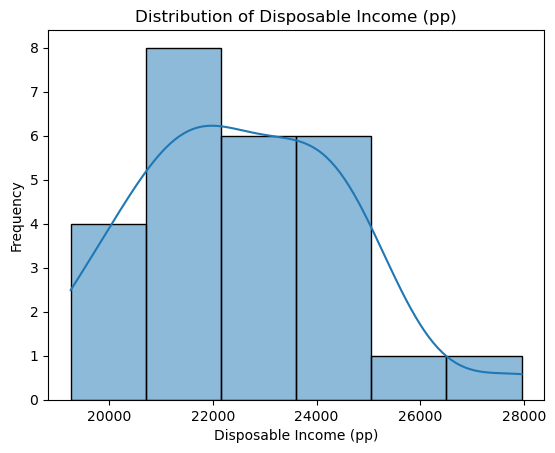

In [108]:
# Visualize the distribution of our test variable 

sns.histplot(df['Disposable Income (pp)'], kde=True)
plt.title('Distribution of Disposable Income (pp)')
plt.xlabel('Disposable Income (pp)')
plt.ylabel('Frequency')
plt.show()



#### Now we can statistically test elements of our variable with Normal distribution using the cumulative distribution function (cdf) 

#### Question 1: What is the probability of Disposable Income being less than €24,000 

In [109]:
#Question 1: What is the probability of Disposable Income being less than €24,000 

mu = df['Disposable Income (pp)'].mean()
sigma = df['Disposable Income (pp)'].std()


print("Mu=",mu)
print("Sigma=",sigma)
print ("The probability of our Disposable Income being less than €24,000: ",norm.cdf(24000, mu, sigma))

Mu= 22626.134615384617
Sigma= 2028.2132645976476
The probability of our Disposable Income being less than €24,000:  0.7509166638324322


#### Question 2: What is the probability of Disposable Income being between €28,000 and €24,000 

In [110]:
#Question 2 (part 1): What is the probability of Disposable Income being less than €28,000 


mu = df['Disposable Income (pp)'].mean()
sigma = df['Disposable Income (pp)'].std()


print("Mu=",mu)
print("Sigma=",sigma)
print ("The probability of our Disposable Income being less than €28,000: ",norm.cdf(28000, mu, sigma))

Mu= 22626.134615384617
Sigma= 2028.2132645976476
The probability of our Disposable Income being less than €28,000:  0.9959701237781426


In [111]:
#Question 2 (part 2): Calculate the probability of Disposable Income being between €28,000 and €24,000 

print ("The probability of our Disposable Income being between €28,000 and €24,000: ",norm.cdf(28000, mu, sigma) - norm.cdf(24000, mu, sigma))

The probability of our Disposable Income being between €28,000 and €24,000:  0.24505345994571048


### 4. Distribution Differentiation 

## Data Preperation and Visualisation (Part 2) 

### Exploratory Data Analysis

In [112]:
# Primary Datasets

In [113]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6107 non-null   object 
 1   Url              5681 non-null   object 
 2   Telephone        5230 non-null   object 
 3   Longitude        6107 non-null   float64
 4   Latitude         6107 non-null   float64
 5   AddressRegion    6107 non-null   object 
 6   AddressLocality  5996 non-null   object 
 7   AddressCountry   6107 non-null   object 
 8   Tags             5949 non-null   object 
dtypes: float64(2), object(7)
memory usage: 429.5+ KB


In [114]:
# Exploring data types

df.dtypes

County                             object
Household Income (million EUR)    float64
Persons at Work (%)               float64
Disposable Income (pp)            float64
Total Activities                    int64
Total Accommodation                 int64
Total Attractions                   int64
Activity Range                     object
Accommodation Range                object
Attraction Range                   object
dtype: object

In [115]:
# Looking at data for duplicates

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [116]:
# Looking at count of data

df.count() 

County                            26
Household Income (million EUR)    26
Persons at Work (%)               26
Disposable Income (pp)            26
Total Activities                  26
Total Accommodation               26
Total Attractions                 26
Activity Range                    26
Accommodation Range               26
Attraction Range                  26
dtype: int64

In [117]:
# Looking at null values

print(df.isnull().sum())

County                            0
Household Income (million EUR)    0
Persons at Work (%)               0
Disposable Income (pp)            0
Total Activities                  0
Total Accommodation               0
Total Attractions                 0
Activity Range                    0
Accommodation Range               0
Attraction Range                  0
dtype: int64


In [118]:
df.describe()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6925.300000,3.846154,22626.134615,234.884615,89.884615,7.038462
std,11883.395002,6.010675,2028.213265,247.627353,85.254596,7.623547
min,980.930000,0.550000,19252.820000,27.000000,8.000000,0.000000
25%,2340.367500,1.380000,21178.392500,70.750000,34.250000,3.000000
50%,4093.015000,1.830000,22535.025000,168.500000,56.000000,5.000000
75%,5575.495000,3.530000,24146.982500,296.750000,127.750000,7.750000
max,61920.180000,30.420000,27958.060000,1140.000000,308.000000,33.000000


#### Basic visualisations

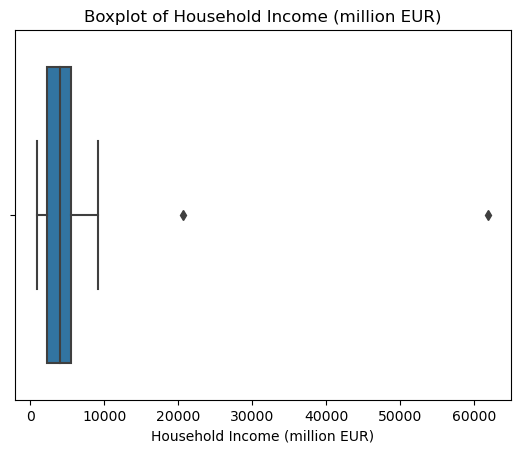

In [119]:
# Plotting boxplots to see outliers

sns.boxplot(x=df["Household Income (million EUR)"])
plt.title("Boxplot of Household Income (million EUR)")
plt.show()

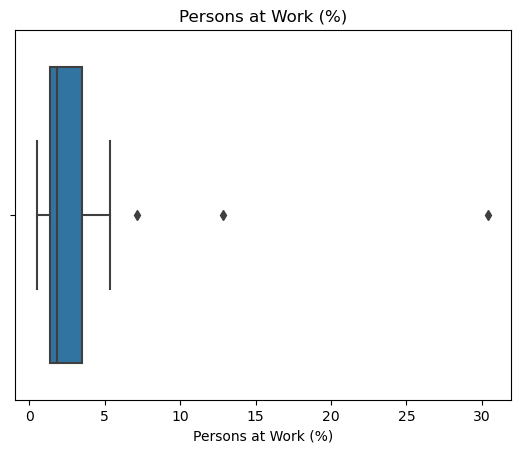

In [120]:
# Plotting boxplots to see outliers

sns.boxplot(x=df["Persons at Work (%)"])
plt.title("Persons at Work (%)")
plt.show()

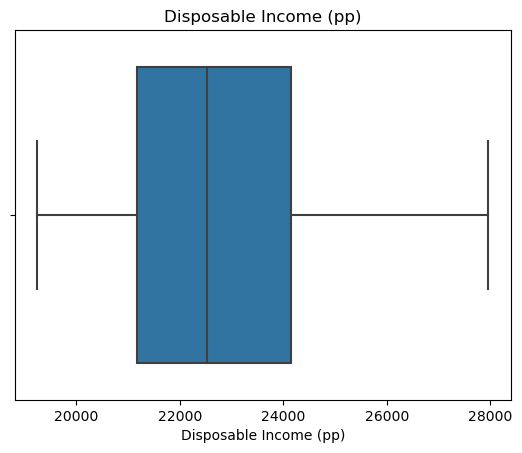

In [121]:
# Plotting boxplots to see outliers

sns.boxplot(x=df["Disposable Income (pp)"])
plt.title("Disposable Income (pp)")
plt.show()

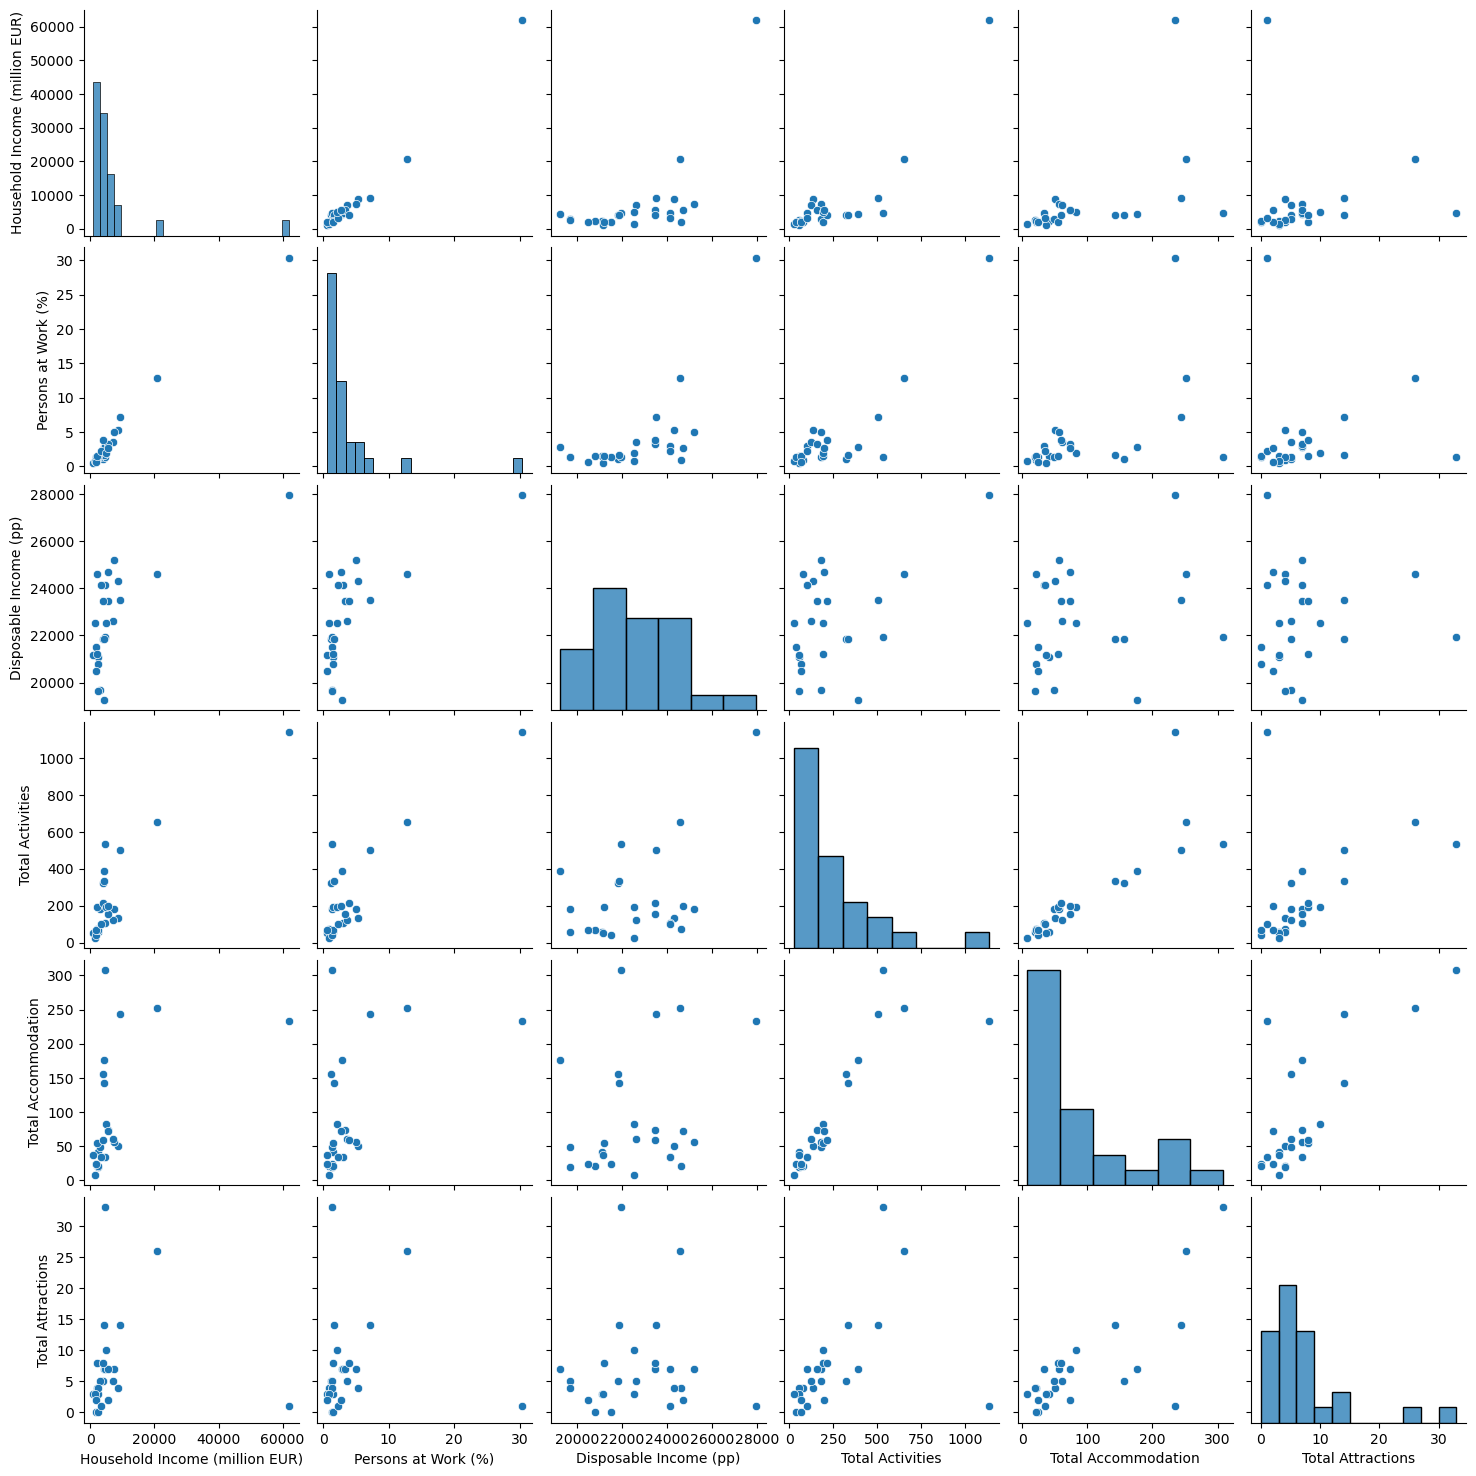

In [122]:
# Pairplot to look at all features 

sns.pairplot(df)

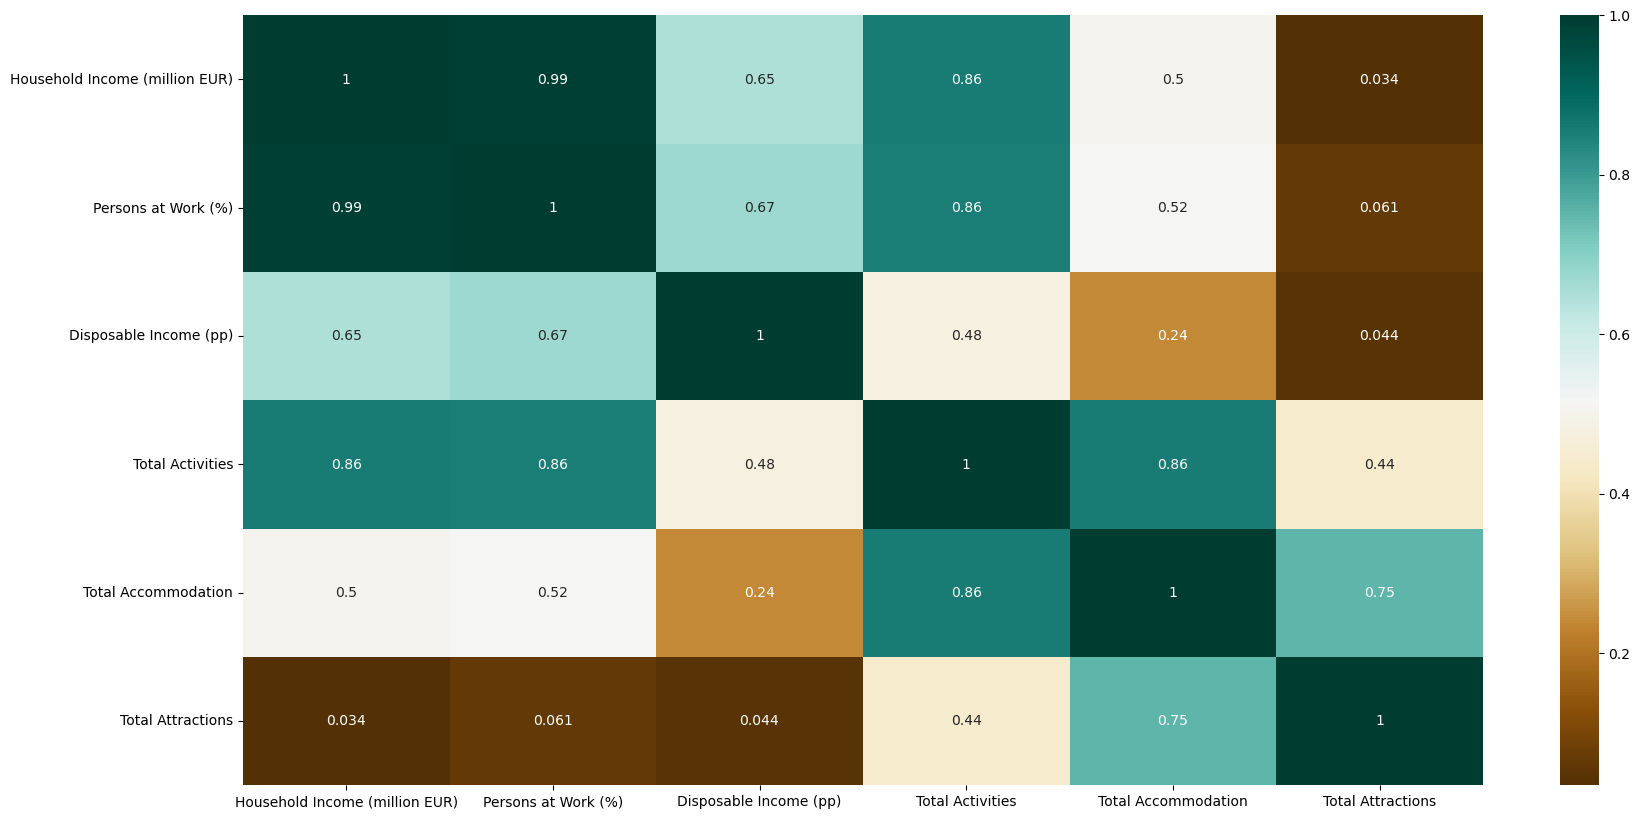

In [123]:
# Drop object feature columns so we can create a correlation heatmap

numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20,10))
c = numerical_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

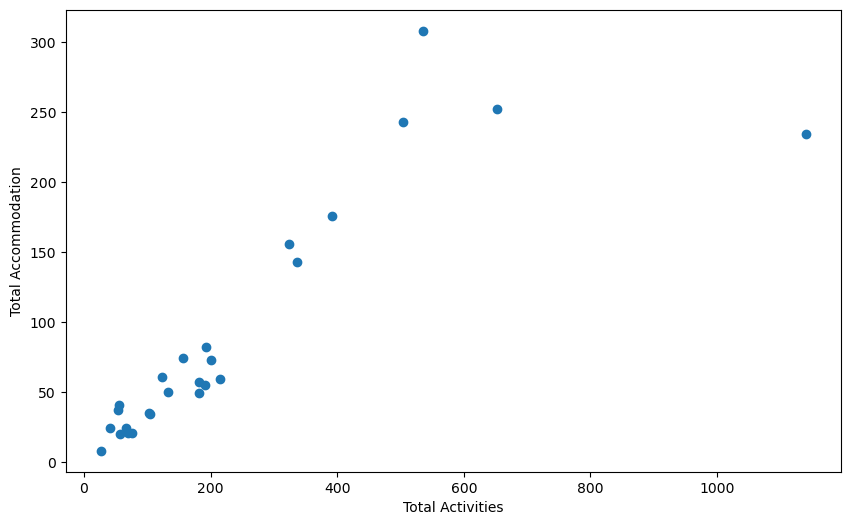

In [124]:
# Create scatter plot to look at a positive regression between two variables

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Total Activities"], df["Total Accommodation"])
ax.set_xlabel("Total Activities")
ax.set_ylabel("Total Accommodation")
plt.show()

### Encoding

In [125]:
# Import libraries

from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

#### Ordinal Encoding

In [126]:
# Specify our 'Range' amenitiy columns to be encoded

range_columns = ['Activity Range', 'Accommodation Range', 'Attraction Range']

# Create instance of Ordinal Encoder with the value mapping we want

ord_encoder = OrdinalEncoder(categories=[['Low', 'Middle', 'High']] * len(range_columns))

# Fit and transform columns using OrdinalEncoder
encoded_data = ord_encoder.fit_transform(df[range_columns])

# Replace the original columns with the encoded values we mapped
for i, col in enumerate(range_columns):
    df[col] = encoded_data[:, i]

In [127]:
print(df[range_columns].head(10))

   Activity Range  Accommodation Range  Attraction Range
0             0.0                  0.0               1.0
1             0.0                  1.0               0.0
2             2.0                  2.0               1.0
3             2.0                  2.0               2.0
4             2.0                  2.0               1.0
5             2.0                  2.0               0.0
6             2.0                  2.0               2.0
7             2.0                  2.0               2.0
8             1.0                  1.0               1.0
9             1.0                  1.0               1.0


#### One Hot Encoding

In [128]:
# use Pandas 'get_dummies' to convert our County column into an array and True/False binary values

ohe_df = pd.get_dummies(df,columns=['County'],sparse=True)


In [129]:
# Print new df to check operations

ohe_df

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,County_Carlow,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
0,2032.30,0.88,24606.46,76,21,4,0.0,0.0,1.0,True,...,False,False,False,False,False,False,False,False,False,False
1,2333.79,1.53,21096.88,55,41,3,0.0,1.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
2,3892.75,1.12,21834.88,324,156,5,2.0,2.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
3,20711.12,12.83,24599.56,653,252,26,2.0,2.0,2.0,False,...,False,False,False,False,False,False,False,False,False,False
4,4242.44,2.91,19252.82,391,176,7,2.0,2.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
5,61920.18,30.42,27958.06,1140,234,1,2.0,2.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
6,9216.74,7.18,23495.35,504,243,14,2.0,2.0,2.0,False,...,False,False,False,False,False,False,False,False,False,False
7,4669.78,1.38,21937.40,535,308,33,2.0,2.0,2.0,False,...,False,False,False,False,False,False,False,False,False,False
8,8743.87,5.33,24298.59,133,50,4,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
9,2926.90,1.39,19695.82,181,49,5,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False


In [130]:
# Now we must convert out variables from True/False into numerical values

num_ohe_df = ohe_df.astype(int)


print(num_ohe_df)

    Household Income (million EUR)  Persons at Work (%)  \
0                             2032                    0   
1                             2333                    1   
2                             3892                    1   
3                            20711                   12   
4                             4242                    2   
5                            61920                   30   
6                             9216                    7   
7                             4669                    1   
8                             8743                    5   
9                             2926                    1   
10                            2479                    1   
11                             980                    0   
12                            7357                    5   
13                            1325                    0   
14                            4596                    2   
15                            4134                    1 

In [131]:
num_ohe_df.head(10)

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,County_Carlow,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
0,2032,0,24606,76,21,4,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2333,1,21096,55,41,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3892,1,21834,324,156,5,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,20711,12,24599,653,252,26,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,4242,2,19252,391,176,7,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
5,61920,30,27958,1140,234,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9216,7,23495,504,243,14,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
7,4669,1,21937,535,308,33,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
8,8743,5,24298,133,50,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2926,1,19695,181,49,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# Export our Numerical OHE dataframe to a csv for future use

num_ohe_df.to_csv('ohe_df.csv', index=False)

### Data scaling 

In [133]:
#import libraries

import sklearn.preprocessing as preproc

In [134]:
# Import our OHE/Numerical dataframe into notebook as df for ease of use


df = pd.read_csv("ohe_df.csv")

In [135]:
# View our data again to look at the central tendenciesof features to identify the scaling that might be needed

df.describe()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,County_Carlow,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6924.769231,3.346154,22625.576923,234.884615,89.884615,7.038462,1.000000,1.000000,0.923077,0.038462,...,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462
std,11883.472150,6.026225,2028.302880,247.627353,85.254596,7.623547,0.848528,0.848528,0.796145,0.196116,...,0.196116,0.196116,0.196116,0.196116,0.196116,0.196116,0.196116,0.196116,0.196116,0.196116
min,980.000000,0.000000,19252.000000,27.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2339.750000,1.000000,21177.750000,70.750000,34.250000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4092.500000,1.500000,22534.500000,168.500000,56.000000,5.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5575.250000,3.000000,24146.500000,296.750000,127.750000,7.750000,2.000000,2.000000,1.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61920.000000,30.000000,27958.000000,1140.000000,308.000000,33.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
# Of the six features that we will look at from the above, only Disposable Income (pp) has a mean that is close to the 50%
# which indicates that it is probably normaly distributed. The other five have variance and are skewed

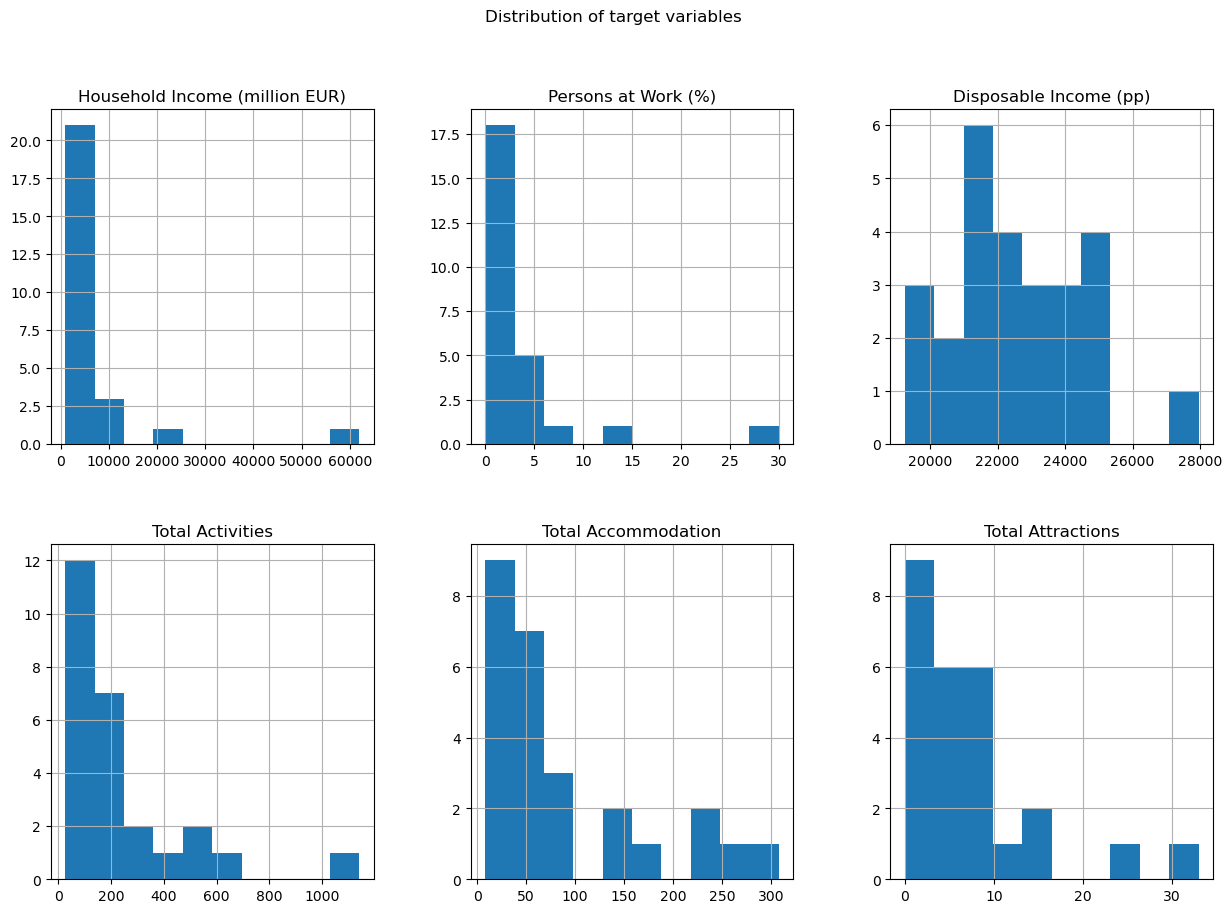

In [137]:
# Select target columns from DataFrame

target_cols = df[['Household Income (million EUR)', 'Persons at Work (%)', 
               'Disposable Income (pp)', 'Total Activities', 
               'Total Accommodation', 'Total Attractions']]



# Plot histograms for each target variable

target_cols.hist(layout=(2, 3), figsize=(15, 10))  
plt.suptitle('Distribution of target variables')
plt.show()

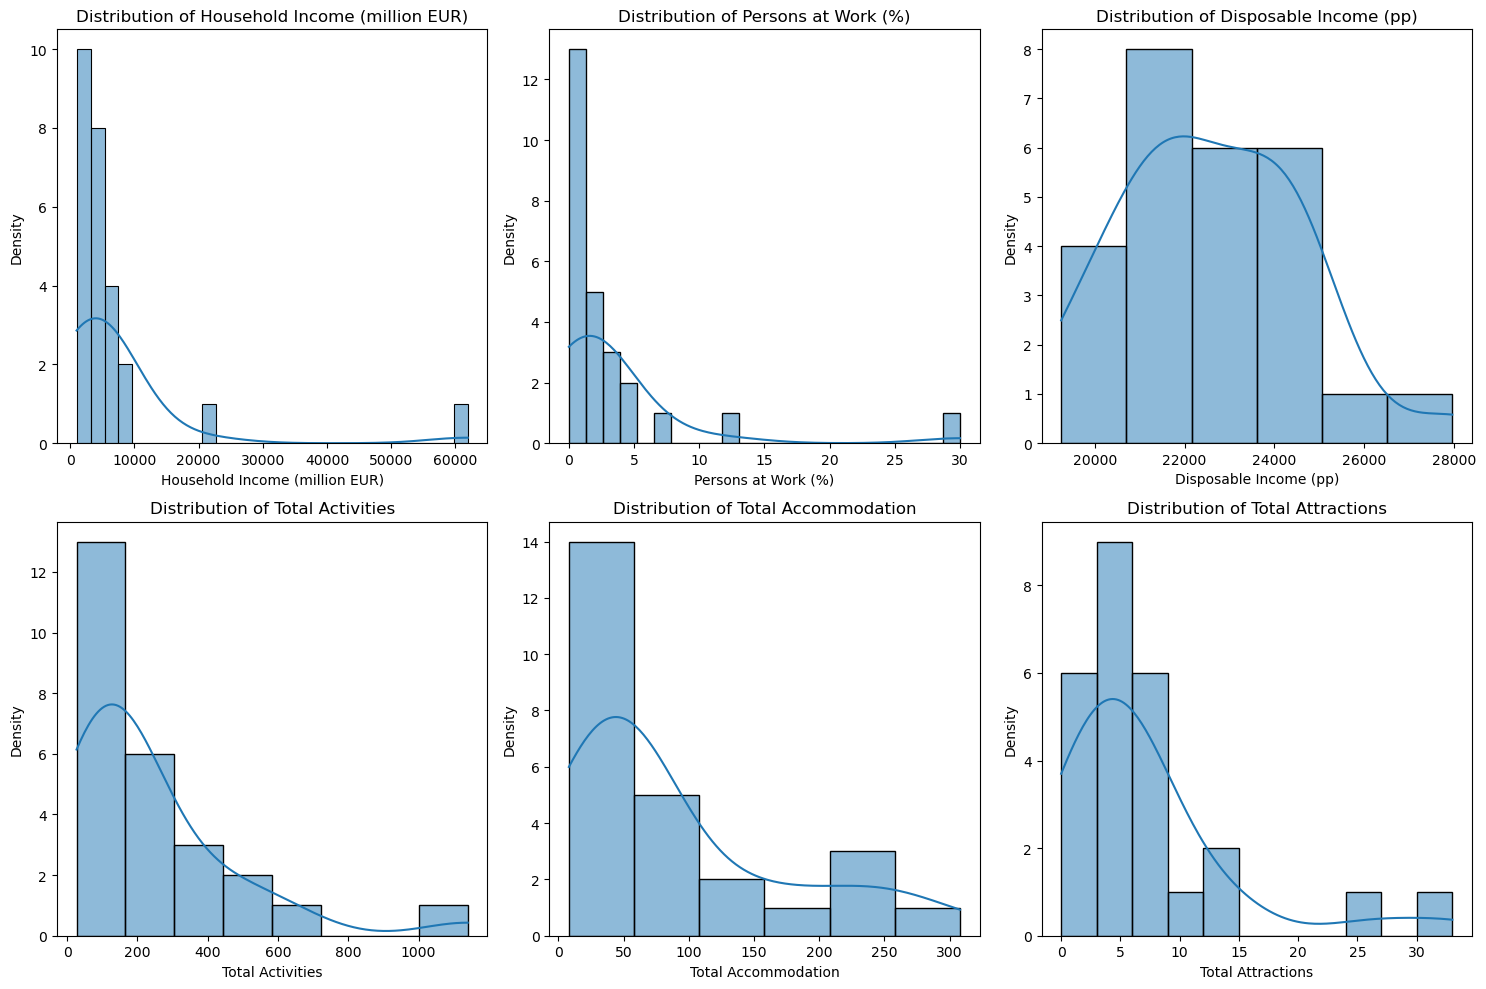

In [138]:
# Visualise using Seaborn

# Set layout for subplots as above
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for iteration
axes = axes.flatten()

# Loop through each col in our target_cols and plot a histogram 
for i, col in enumerate(target_cols.columns):
    ax = axes[i]
    sns.histplot(target_cols[col], ax=ax, kde=True) 
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Standard Scaler

In [139]:
# Standard scaler is used on our variables that are displaying as relatively normal distribution in this case -
# we will apply it only to the 'Disposable Income (pp)' feature 

In [140]:
df["Dis_Income_Stand"]=preproc.StandardScaler().fit_transform(df[["Disposable Income (pp)"]])

In [141]:
df["Dis_Income_Stand"]

0     0.995731
1    -0.769051
2    -0.397994
3     0.992211
4    -1.696190
5     2.681072
6     0.437134
7    -0.346207
8     0.840872
9    -1.473455
10   -1.491556
11   -0.732850
12    1.288855
13   -0.042021
14    0.767465
15   -0.390955
16    0.000716
17   -0.557881
18   -0.915362
19   -1.080779
20   -0.713242
21    0.425570
22    0.427581
23    0.756404
24   -0.049563
25    1.043495
Name: Dis_Income_Stand, dtype: float64

#### Min/Max Scaler

In [142]:
df["House_Income_MinMax"]=preproc.minmax_scale(df[["Household Income (million EUR)"]])

In [143]:
df["Per_Wor_MinMax"]=preproc.minmax_scale(df[["Persons at Work (%)"]])

In [144]:
df["Activities_MinMax"]=preproc.minmax_scale(df[["Total Activities"]])

In [145]:
df["Accommodation_MinMax"]=preproc.minmax_scale(df[["Total Accommodation"]])

In [146]:
df["Attractions_MinMax"]=preproc.minmax_scale(df[["Total Attractions"]])

In [147]:
df.head()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,County_Carlow,...,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow,Dis_Income_Stand,House_Income_MinMax,Per_Wor_MinMax,Activities_MinMax,Accommodation_MinMax,Attractions_MinMax
0,2032,0,24606,76,21,4,0,0,1,1,...,0,0,0,0,0.995731,0.017263,0.000000,0.044025,0.043333,0.121212
1,2333,1,21096,55,41,3,0,1,0,0,...,0,0,0,0,-0.769051,0.022202,0.033333,0.025157,0.110000,0.090909
2,3892,1,21834,324,156,5,2,2,1,0,...,0,0,0,0,-0.397994,0.047785,0.033333,0.266846,0.493333,0.151515
3,20711,12,24599,653,252,26,2,2,2,0,...,0,0,0,0,0.992211,0.323777,0.400000,0.562444,0.813333,0.787879
4,4242,2,19252,391,176,7,2,2,1,0,...,0,0,0,0,-1.696190,0.053528,0.066667,0.327044,0.560000,0.212121


In [148]:
# Visualise scaling 

In [149]:
scaled_cols = df[['House_Income_MinMax', 'Per_Wor_MinMax', 'Activities_MinMax',
               'Accommodation_MinMax', 'Attractions_MinMax', 'Dis_Income_Stand']]

# Printing the selected columns
print(scaled_cols)

    House_Income_MinMax  Per_Wor_MinMax  Activities_MinMax  \
0              0.017263        0.000000           0.044025   
1              0.022202        0.033333           0.025157   
2              0.047785        0.033333           0.266846   
3              0.323777        0.400000           0.562444   
4              0.053528        0.066667           0.327044   
5              1.000000        1.000000           1.000000   
6              0.135149        0.233333           0.428571   
7              0.060535        0.033333           0.456424   
8              0.127388        0.166667           0.095238   
9              0.031933        0.033333           0.138365   
10             0.024598        0.033333           0.026954   
11             0.000000        0.000000           0.023360   
12             0.104644        0.166667           0.139263   
13             0.005661        0.000000           0.000000   
14             0.059337        0.066667           0.069182   
15      

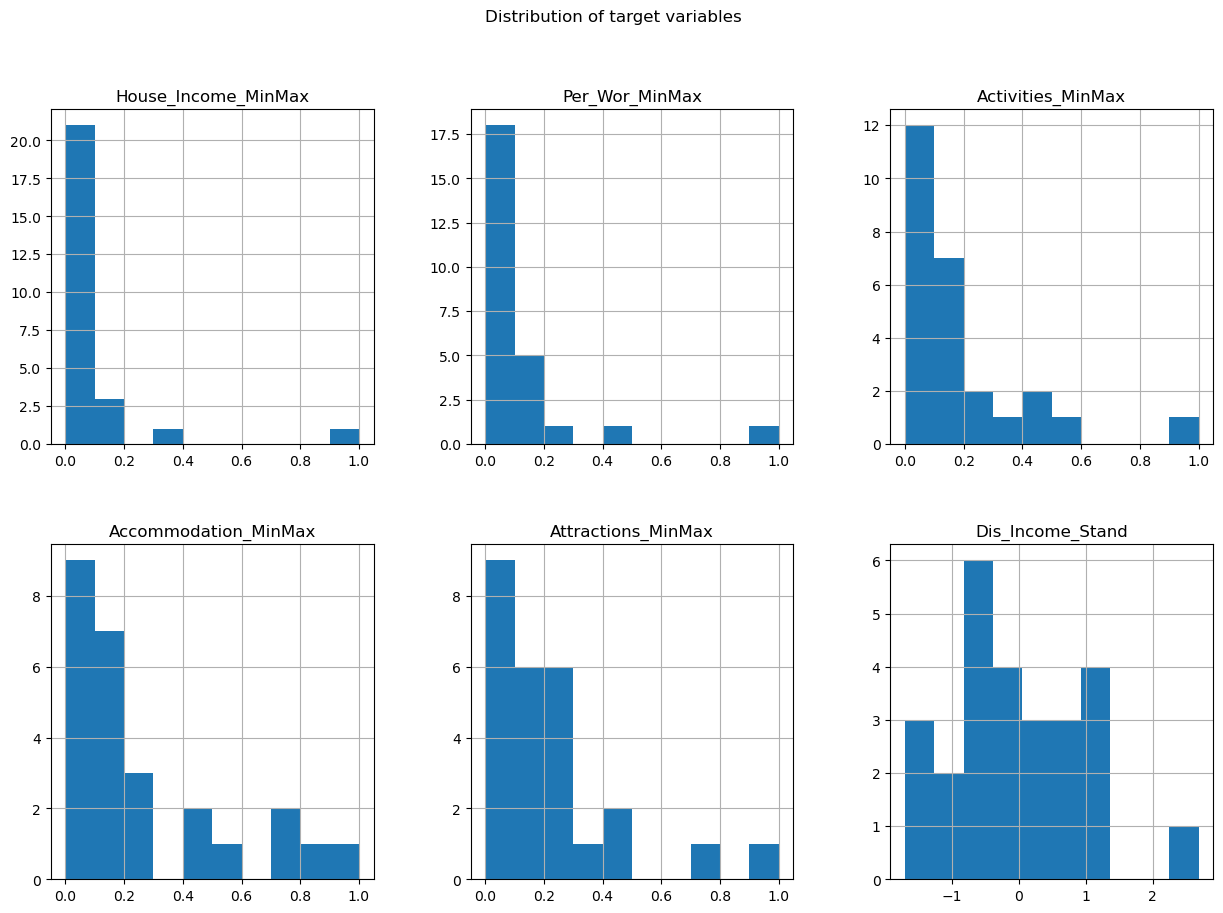

In [150]:
# Plot histograms for each target variable

scaled_cols.hist(layout=(2, 3), figsize=(15, 10))  
plt.suptitle('Distribution of target variables')
plt.show()

In [151]:
df.head()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,County_Carlow,...,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow,Dis_Income_Stand,House_Income_MinMax,Per_Wor_MinMax,Activities_MinMax,Accommodation_MinMax,Attractions_MinMax
0,2032,0,24606,76,21,4,0,0,1,1,...,0,0,0,0,0.995731,0.017263,0.000000,0.044025,0.043333,0.121212
1,2333,1,21096,55,41,3,0,1,0,0,...,0,0,0,0,-0.769051,0.022202,0.033333,0.025157,0.110000,0.090909
2,3892,1,21834,324,156,5,2,2,1,0,...,0,0,0,0,-0.397994,0.047785,0.033333,0.266846,0.493333,0.151515
3,20711,12,24599,653,252,26,2,2,2,0,...,0,0,0,0,0.992211,0.323777,0.400000,0.562444,0.813333,0.787879
4,4242,2,19252,391,176,7,2,2,1,0,...,0,0,0,0,-1.696190,0.053528,0.066667,0.327044,0.560000,0.212121


In [152]:
# Export numerical data

df.to_csv('ohe_scaled_df.csv', index=False)

### Data Visuaisation 

In [153]:
df.head()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,County_Carlow,...,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow,Dis_Income_Stand,House_Income_MinMax,Per_Wor_MinMax,Activities_MinMax,Accommodation_MinMax,Attractions_MinMax
0,2032,0,24606,76,21,4,0,0,1,1,...,0,0,0,0,0.995731,0.017263,0.000000,0.044025,0.043333,0.121212
1,2333,1,21096,55,41,3,0,1,0,0,...,0,0,0,0,-0.769051,0.022202,0.033333,0.025157,0.110000,0.090909
2,3892,1,21834,324,156,5,2,2,1,0,...,0,0,0,0,-0.397994,0.047785,0.033333,0.266846,0.493333,0.151515
3,20711,12,24599,653,252,26,2,2,2,0,...,0,0,0,0,0.992211,0.323777,0.400000,0.562444,0.813333,0.787879
4,4242,2,19252,391,176,7,2,2,1,0,...,0,0,0,0,-1.696190,0.053528,0.066667,0.327044,0.560000,0.212121


In [154]:
# 1. Geospatial - Choropleth 

!pip install geopandas

# Install Geopandas library

import geopandas as gpd
import matplotlib.pyplot as plt

In [155]:
# Load in non-encoded County dataframe for visualisations

df = pd.read_csv("num_ohe_df.csv")

In [156]:
df.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range
0,Carlow,2032.30,0.88,24606.46,76,21,4,0.0,0.0,1.0
1,Cavan,2333.79,1.53,21096.88,55,41,3,0.0,1.0,0.0
2,Clare,3892.75,1.12,21834.88,324,156,5,2.0,2.0,1.0
3,Cork,20711.12,12.83,24599.56,653,252,26,2.0,2.0,2.0
4,Donegal,4242.44,2.91,19252.82,391,176,7,2.0,2.0,1.0


In [157]:
# Read in map of Republic of Ireland

ROI_map= gpd.read_file('IRL_adm1.shp')   
ROI_map.NAME_1 

0        Carlow
1         Cavan
2         Clare
3          Cork
4       Donegal
5        Dublin
6        Galway
7         Kerry
8       Kildare
9      Kilkenny
10     Laoighis
11      Leitrim
12     Limerick
13     Longford
14        Louth
15         Mayo
16        Meath
17     Monaghan
18       Offaly
19    Roscommon
20        Sligo
21    Tipperary
22    Waterford
23    Westmeath
24      Wexford
25      Wicklow
Name: NAME_1, dtype: object

In [158]:
# Rename 'Laoighis' to 'Laois'

# Assuming df is your DataFrame
ROI_map['NAME_1'] = ROI_map['NAME_1'].replace('Laoighis', 'Laois')

In [159]:
# Check column names

print(ROI_map.columns)

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'geometry'],
      dtype='object')


In [160]:
# Ensure Counties are listed under 'NAME_1' column

ROI_map.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,109,IRL,Ireland,1,Carlow,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730..."
1,109,IRL,Ireland,2,Cavan,Administrative County,County,None,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377..."
2,109,IRL,Ireland,3,Clare,Administrative County,County,None,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52..."
3,109,IRL,Ireland,4,Cork,Traditional County,County,None,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ..."
4,109,IRL,Ireland,5,Donegal,Administrative County,County,None,Dún na nGall|Tyrconnel,"MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55..."


In [161]:
# Make sure Counties are listed under 'County' column

df.head(26)

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range
0,Carlow,2032.30,0.88,24606.46,76,21,4,0.0,0.0,1.0
1,Cavan,2333.79,1.53,21096.88,55,41,3,0.0,1.0,0.0
2,Clare,3892.75,1.12,21834.88,324,156,5,2.0,2.0,1.0
3,Cork,20711.12,12.83,24599.56,653,252,26,2.0,2.0,2.0
4,Donegal,4242.44,2.91,19252.82,391,176,7,2.0,2.0,1.0
5,Dublin,61920.18,30.42,27958.06,1140,234,1,2.0,2.0,0.0
6,Galway,9216.74,7.18,23495.35,504,243,14,2.0,2.0,2.0
7,Kerry,4669.78,1.38,21937.40,535,308,33,2.0,2.0,2.0
8,Kildare,8743.87,5.33,24298.59,133,50,4,1.0,1.0,1.0
9,Kilkenny,2926.90,1.39,19695.82,181,49,5,1.0,1.0,1.0


In [162]:
# Join our two dataframes on the common 'County' value index

# Set map index to Counties
ROI_map=ROI_map.set_index('NAME_1')

# Set dataframe index to Counties
df=df.set_index('County')

# Join map to our df and save into a new df (df2)
df2= ROI_map.join(df)

# Set Name_1 (County list) to index of our new dataframe
df2['name1'] = df2.index

# Print total head to test
df2.head(26) 

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,name1
NAME_1,,,,,,,,,,,,,,,,,,,
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730...",2032.30,0.88,24606.46,76,21,4,0.0,0.0,1.0,Carlow
Cavan,109,IRL,Ireland,2,Administrative County,County,None,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377...",2333.79,1.53,21096.88,55,41,3,0.0,1.0,0.0,Cavan
Clare,109,IRL,Ireland,3,Administrative County,County,None,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52...",3892.75,1.12,21834.88,324,156,5,2.0,2.0,1.0,Clare
Cork,109,IRL,Ireland,4,Traditional County,County,None,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ...",20711.12,12.83,24599.56,653,252,26,2.0,2.0,2.0,Cork
Donegal,109,IRL,Ireland,5,Administrative County,County,None,Dún na nGall|Tyrconnel,"MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55...",4242.44,2.91,19252.82,391,176,7,2.0,2.0,1.0,Donegal
Dublin,109,IRL,Ireland,6,Administrative County,County,None,Baile Átha Cliath,"MULTIPOLYGON (((-6.04858 53.37128, -6.04919 53...",61920.18,30.42,27958.06,1140,234,1,2.0,2.0,0.0,Dublin
Galway,109,IRL,Ireland,7,Traditional County,County,None,Gaillimh,"MULTIPOLYGON (((-9.59750 53.34375, -9.59750 53...",9216.74,7.18,23495.35,504,243,14,2.0,2.0,2.0,Galway
Kerry,109,IRL,Ireland,8,Administrative County,County,None,Ciarraí,"MULTIPOLYGON (((-10.21028 51.99903, -10.20972 ...",4669.78,1.38,21937.40,535,308,33,2.0,2.0,2.0,Kerry
Kildare,109,IRL,Ireland,9,Administrative County,County,None,Cill Dara,"POLYGON ((-6.46413 53.22897, -6.46419 53.22890...",8743.87,5.33,24298.59,133,50,4,1.0,1.0,1.0,Kildare


In [163]:
df2.head(26)

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,name1
NAME_1,,,,,,,,,,,,,,,,,,,
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730...",2032.30,0.88,24606.46,76,21,4,0.0,0.0,1.0,Carlow
Cavan,109,IRL,Ireland,2,Administrative County,County,None,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377...",2333.79,1.53,21096.88,55,41,3,0.0,1.0,0.0,Cavan
Clare,109,IRL,Ireland,3,Administrative County,County,None,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52...",3892.75,1.12,21834.88,324,156,5,2.0,2.0,1.0,Clare
Cork,109,IRL,Ireland,4,Traditional County,County,None,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ...",20711.12,12.83,24599.56,653,252,26,2.0,2.0,2.0,Cork
Donegal,109,IRL,Ireland,5,Administrative County,County,None,Dún na nGall|Tyrconnel,"MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55...",4242.44,2.91,19252.82,391,176,7,2.0,2.0,1.0,Donegal
Dublin,109,IRL,Ireland,6,Administrative County,County,None,Baile Átha Cliath,"MULTIPOLYGON (((-6.04858 53.37128, -6.04919 53...",61920.18,30.42,27958.06,1140,234,1,2.0,2.0,0.0,Dublin
Galway,109,IRL,Ireland,7,Traditional County,County,None,Gaillimh,"MULTIPOLYGON (((-9.59750 53.34375, -9.59750 53...",9216.74,7.18,23495.35,504,243,14,2.0,2.0,2.0,Galway
Kerry,109,IRL,Ireland,8,Administrative County,County,None,Ciarraí,"MULTIPOLYGON (((-10.21028 51.99903, -10.20972 ...",4669.78,1.38,21937.40,535,308,33,2.0,2.0,2.0,Kerry
Kildare,109,IRL,Ireland,9,Administrative County,County,None,Cill Dara,"POLYGON ((-6.46413 53.22897, -6.46419 53.22890...",8743.87,5.33,24298.59,133,50,4,1.0,1.0,1.0,Kildare


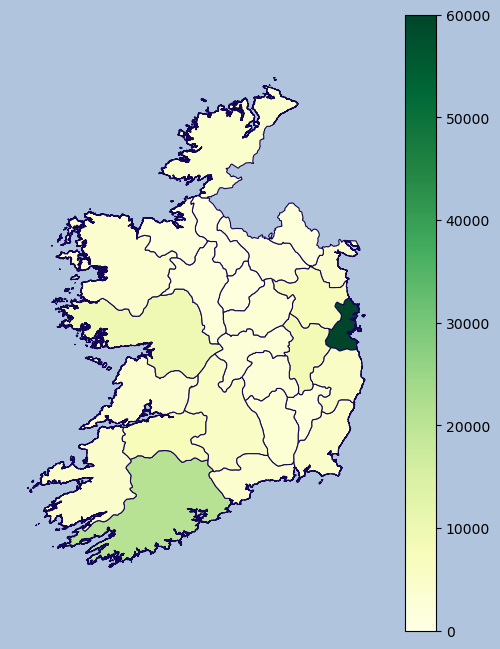

In [164]:
#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 60000 

# Subplot colour background and specs
fig, ax = plt.subplots(figsize=(6,8),facecolor='lightsteelblue')
fig=df2.plot(column='Household Income (million EUR)', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',facecolor='lightslategray',vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off');



(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

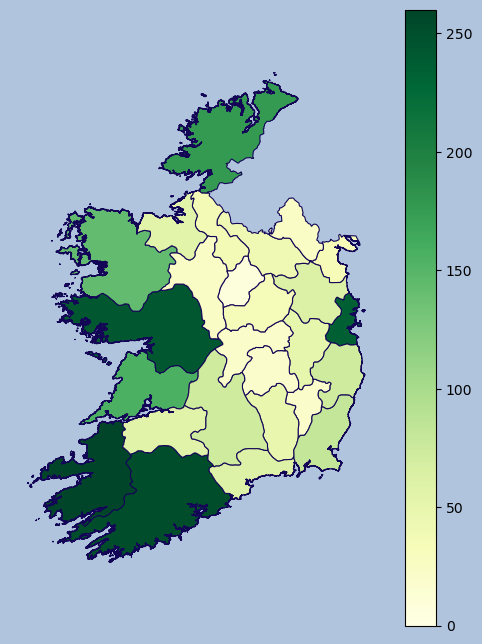

In [165]:
#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 260 

# Subplot colour background and specs
fig, ax = plt.subplots(figsize=(6,8),facecolor='lightsteelblue')
fig=df2.plot(column='Total Accommodation', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',facecolor='lightslategray',vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')

(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

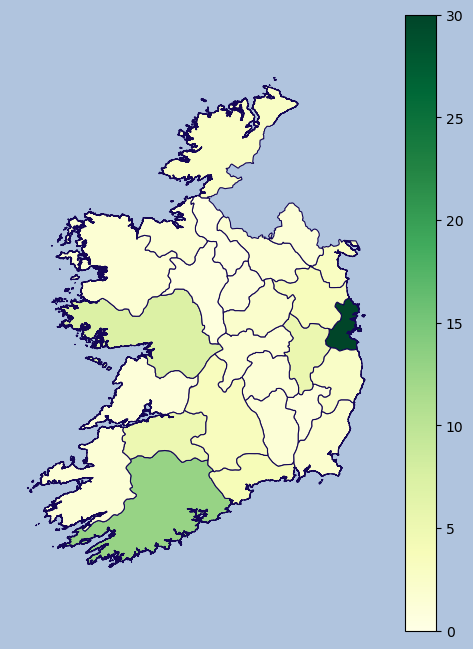

In [166]:
#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 30 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8),facecolor='lightsteelblue')
fig=df2.plot(column='Persons at Work (%)', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',facecolor='lightslategray',vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')

(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

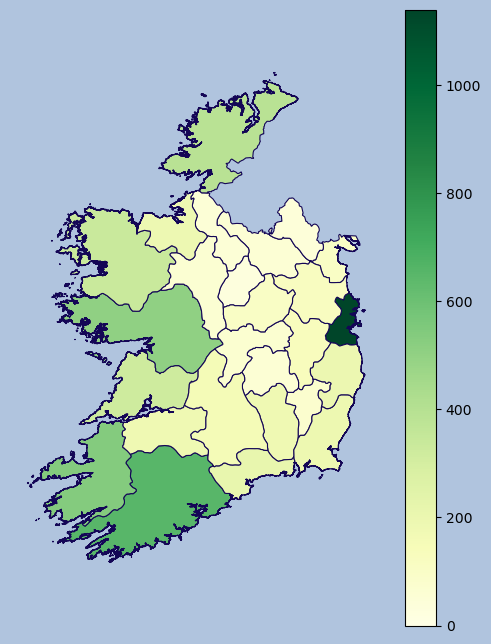

In [167]:
#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 1140 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8),facecolor='lightsteelblue')
fig=df2.plot(column='Total Activities', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',facecolor='lightslategray',vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')

(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

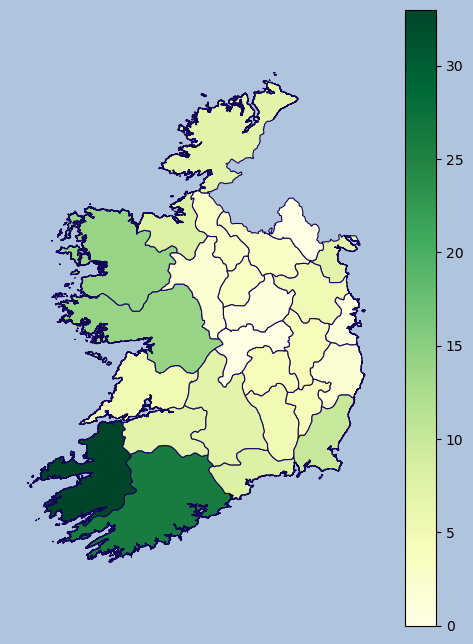

In [168]:
#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 33 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8),facecolor='lightsteelblue')
fig=df2.plot(column='Total Attractions', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',facecolor='lightslategray',vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')

(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

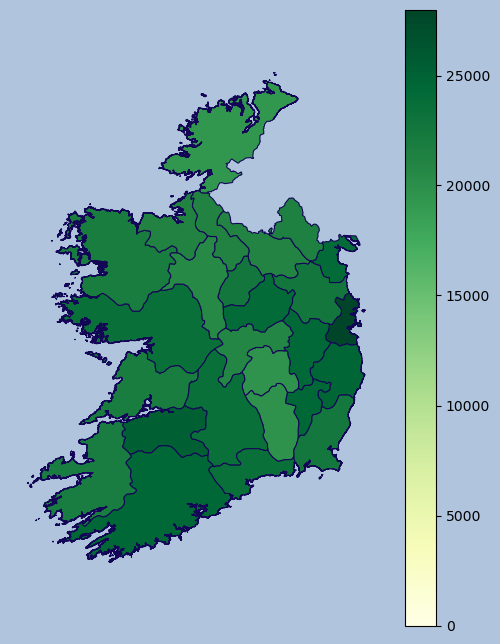

In [169]:
#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 28000 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8),facecolor='lightsteelblue')
fig=df2.plot(column='Disposable Income (pp)', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',facecolor='lightslategray',vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')

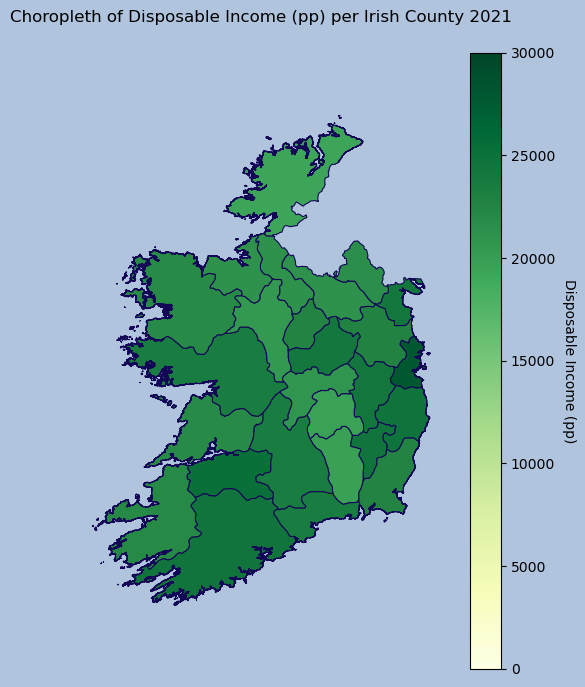

In [170]:
# Re-plot with title and colour bar legend text

#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 30000 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8), facecolor='lightsteelblue')

# Plot the map and assign the plot to a variable
map_plot = df2.plot(column='Disposable Income (pp)', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',
                    facecolor='lightslategray', vmin=vmin, vmax=vmax,
                    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Turn off axis
ax.axis('off')

# Add colorbar legend
cbar = map_plot.get_figure().get_axes()[1]
cbar.set_ylabel('Disposable Income (pp)', rotation=270, labelpad=15)

# Add title to the plot
plt.title('Choropleth of Disposable Income (pp) per Irish County 2021', pad=50, x=0.5)

plt.show()

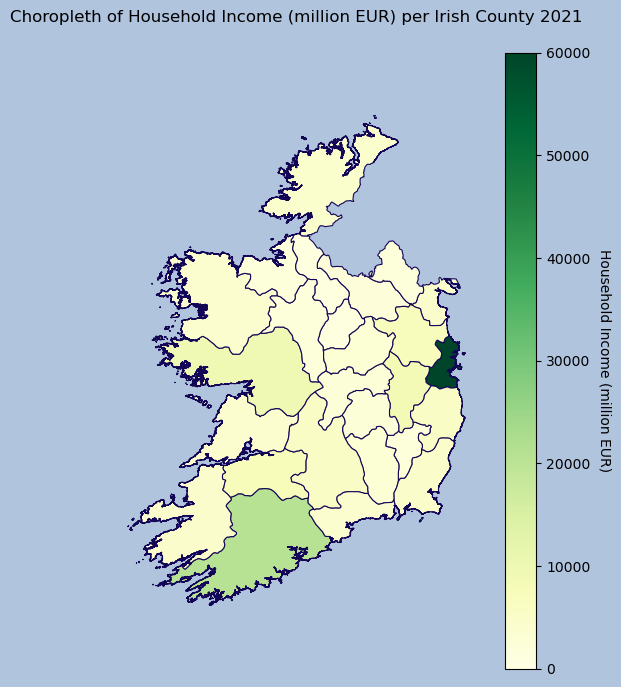

In [171]:
# Re-plot with title and colour bar legend text

#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 60000 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8), facecolor='lightsteelblue')

# Plot the map and assign the plot to a variable
map_plot = df2.plot(column='Household Income (million EUR)', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',
                    facecolor='lightslategray', vmin=vmin, vmax=vmax,
                    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Turn off axis
ax.axis('off')

# Add colorbar legend
cbar = map_plot.get_figure().get_axes()[1]
cbar.set_ylabel('Household Income (million EUR)', rotation=270, labelpad=15)

# Add title to the plot
plt.title('Choropleth of Household Income (million EUR) per Irish County 2021', pad=50, x=0.5)

plt.show()

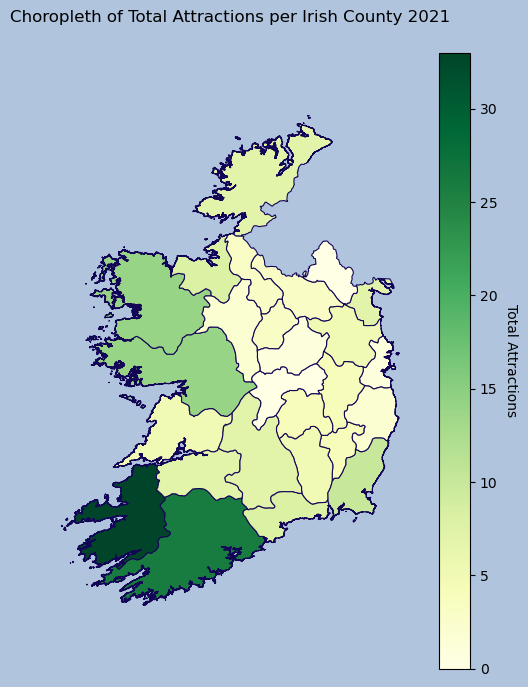

In [172]:
# Re-plot with title and colour bar legend text

#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 33 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8), facecolor='lightsteelblue')

# Plot the map and assign the plot to a variable
map_plot = df2.plot(column='Total Attractions', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',
                    facecolor='lightslategray', vmin=vmin, vmax=vmax,
                    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Turn off axis
ax.axis('off')

# Add colorbar legend
cbar = map_plot.get_figure().get_axes()[1]
cbar.set_ylabel('Total Attractions', rotation=270, labelpad=15)

# Add title to the plot
plt.title('Choropleth of Total Attractions per Irish County 2021', pad=50, x=0.5)

plt.show()

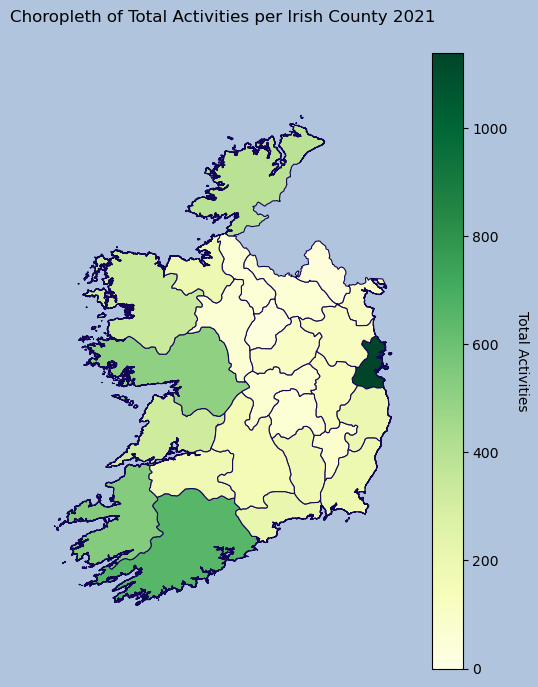

In [173]:
# Re-plot with title and colour bar legend text

#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 1140  

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8), facecolor='lightsteelblue')

# Plot the map and assign the plot to a variable
map_plot = df2.plot(column='Total Activities', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',
                    facecolor='lightslategray', vmin=vmin, vmax=vmax,
                    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Turn off axis
ax.axis('off')

# Add colorbar legend
cbar = map_plot.get_figure().get_axes()[1]
cbar.set_ylabel('Total Activities', rotation=270, labelpad=15)

# Add title to the plot
plt.title('Choropleth of Total Activities per Irish County 2021', pad=50, x=0.5)

plt.show()

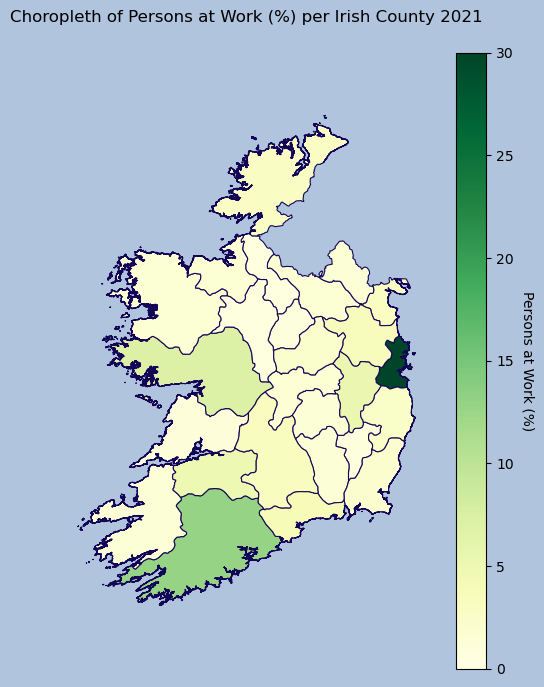

In [174]:
# Re-plot with title and colour bar legend text

#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 30 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8), facecolor='lightsteelblue')

# Plot the map and assign the plot to a variable
map_plot = df2.plot(column='Persons at Work (%)', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',
                    facecolor='lightslategray', vmin=vmin, vmax=vmax,
                    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Turn off axis
ax.axis('off')

# Add colorbar legend
cbar = map_plot.get_figure().get_axes()[1]
cbar.set_ylabel('Persons at Work (%)', rotation=270, labelpad=15)

# Add title to the plot
plt.title('Choropleth of Persons at Work (%) per Irish County 2021', pad=50, x=0.5)

plt.show()

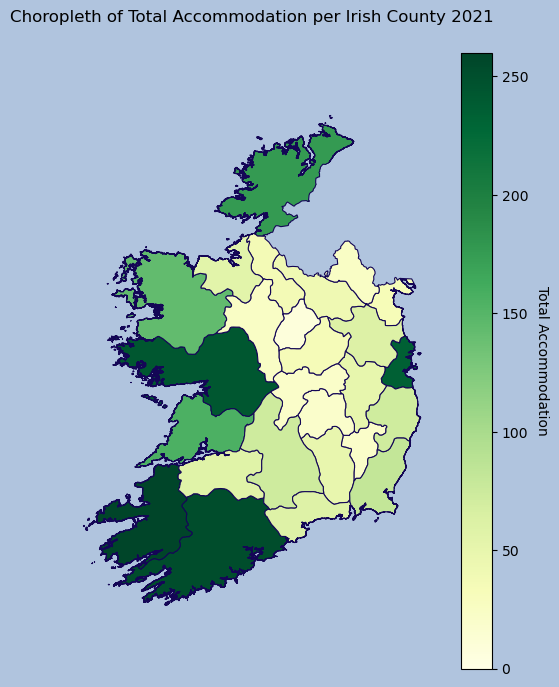

In [175]:
# Re-plot with title and colour bar legend text

#Range of variable you use as map color (lowest to highest)
vmin, vmax = 0, 260 

# Subplot colour background
fig, ax = plt.subplots(figsize=(6,8), facecolor='lightsteelblue')

# Plot the map and assign the plot to a variable
map_plot = df2.plot(column='Total Accommodation', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',
                    facecolor='lightslategray', vmin=vmin, vmax=vmax,
                    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Turn off axis
ax.axis('off')

# Add colorbar legend
cbar = map_plot.get_figure().get_axes()[1]
cbar.set_ylabel('Total Accommodation', rotation=270, labelpad=15)

# Add title to the plot
plt.title('Choropleth of Total Accommodation per Irish County 2021', pad=50, x=0.5)

plt.show()

In [264]:
# Load in non-encoded County dataframe for visualisations

df_vis1 = pd.read_csv("num_ohe_df.csv")

In [277]:
# Find the top 5 values of each of our amenity features and corresponding County value

# Sort the df by 'Total Attractions'
sorted_df = df.sort_values(by='Total Attractions', ascending=False)

# Select the top 5 rows by value
top_5 = sorted_df.head(5)

# Print the top 5 highest values along with their corresponding feature values
print(f"Top 5 Total Attractions")
for index, row in top_5.iterrows():
    print(f"Total Attractions: {row['Total Attractions']}, County: {row['County']}")


Top 5 Attractions
Total Attractions: 33, County: Kerry
Total Attractions: 26, County: Cork
Total Attractions: 14, County: Galway
Total Attractions: 14, County: Mayo
Total Attractions: 10, County: Wexford


In [278]:
#Total Accommodation
# Find the top 5 values of each of our amenity features and corresponding County value

# Sort the df by 'Total Attractions'
sorted_df = df.sort_values(by='Total Accommodation', ascending=False)

# Select the top 5 rows by value
top_5 = sorted_df.head(5)

# Print the top 5 highest values along with their corresponding feature values
print(f"Top 5 Total Accommodation")
for index, row in top_5.iterrows():
    print(f"Total Accommodation: {row['Total Accommodation']}, County: {row['County']}")


Top 5 Total Accommodation
Total Accommodation: 308, County: Kerry
Total Accommodation: 252, County: Cork
Total Accommodation: 243, County: Galway
Total Accommodation: 234, County: Dublin
Total Accommodation: 176, County: Donegal


In [279]:
#Total Activities
# Find the top 5 values of each of our amenity features and corresponding County value

# Sort the df by 'Total Attractions'
sorted_df = df.sort_values(by='Total Activities', ascending=False)

# Select the top 5 rows by value
top_5 = sorted_df.head(5)

# Print the top 5 highest values along with their corresponding feature values
print(f"Top 5 Total Activities")
for index, row in top_5.iterrows():
    print(f"Total Activities: {row['Total Activities']}, County: {row['County']}")


Top 5 Total Activities
Total Activities: 1140, County: Dublin
Total Activities: 653, County: Cork
Total Activities: 535, County: Kerry
Total Activities: 504, County: Galway
Total Activities: 391, County: Donegal


In [283]:
df_vis1.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range
0,Carlow,2032.30,0.88,24606.46,76,21,4,0.0,0.0,1.0
1,Cavan,2333.79,1.53,21096.88,55,41,3,0.0,1.0,0.0
2,Clare,3892.75,1.12,21834.88,324,156,5,2.0,2.0,1.0
3,Cork,20711.12,12.83,24599.56,653,252,26,2.0,2.0,2.0
4,Donegal,4242.44,2.91,19252.82,391,176,7,2.0,2.0,1.0


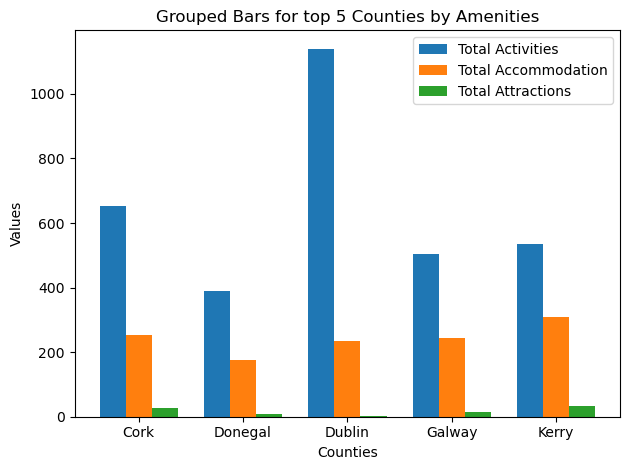

In [285]:
# 2. Multiple amounts: Bar charts, grouped bars, Heatmaps (make sure to explain)

# Filter the DataFrame to include only the desired counties
counties_of_interest = ['Dublin', 'Cork', 'Kerry', 'Galway', 'Donegal']
df_filtered = df_vis1[df_vis1['County'].isin(counties_of_interest)]

# Filter our df and create list of values
categories = df_filtered.index.tolist()  
counties = df_filtered['County'].tolist()  

values1 = df_filtered['Total Activities'].tolist()  
values2 = df_filtered['Total Accommodation'].tolist()  
values3 = df_filtered['Total Attractions'].tolist()  


# Plot styling 
bar_width = 0.25
x = np.arange(len(categories))

# Plot our grouped bars
plt.bar(x - bar_width, values1, bar_width, label='Total Activities')
plt.bar(x, values2, bar_width, label='Total Accommodation')
plt.bar(x + bar_width, values3, bar_width, label='Total Attractions')

# Add labels, title, and legend
plt.xlabel('Counties')
plt.ylabel('Values')
plt.title('Grouped Bars for top 5 Counties by Number of Amenities')
plt.xticks(x, counties) 
plt.legend()

# Show plot
plt.tight_layout() 
plt.show()


In [177]:
# 3. Distributions: Histogram (how many bins and why did we select them?), density plot, quantile-quantile plot(explain)

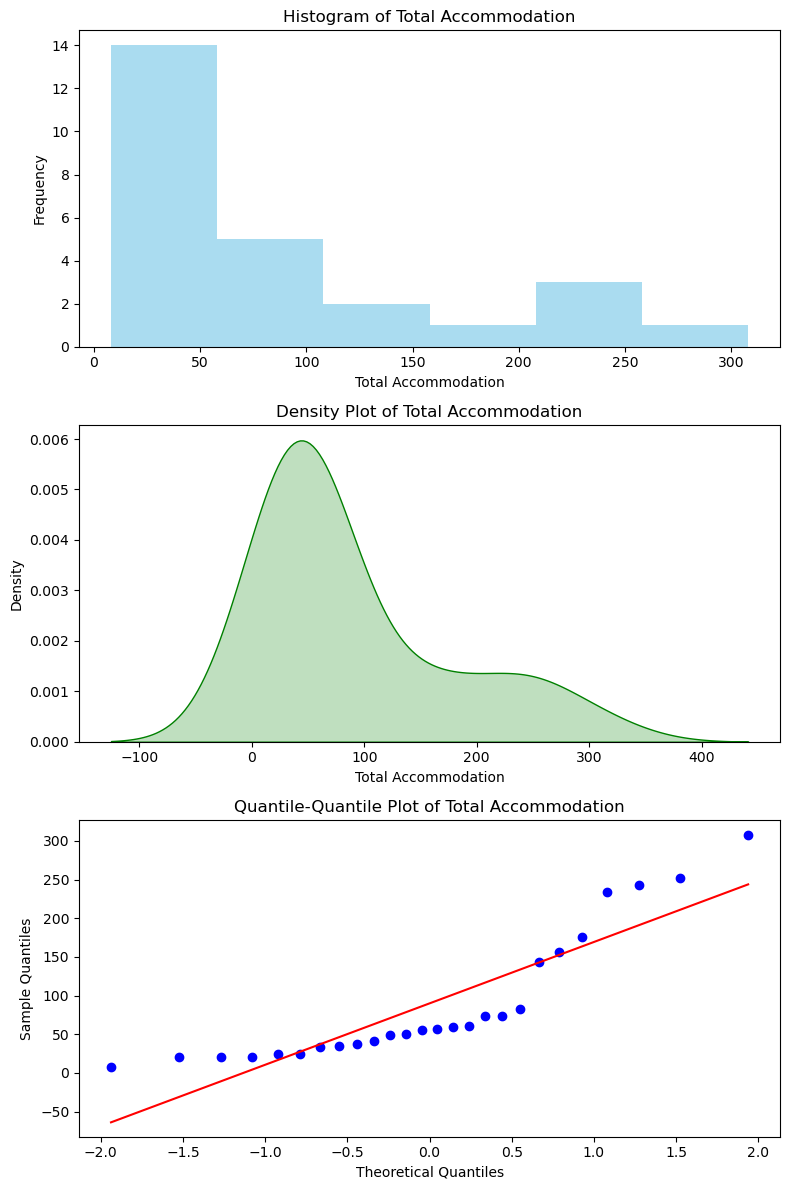

In [289]:


# Set up the figure and axis for subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Histogram with appropriate number of bins
axes[0].hist(df_vis1['Total Accommodation'], bins='auto', color='skyblue', alpha=0.7)
axes[0].set_title('Histogram of Total Accommodation')
axes[0].set_xlabel('Total Accommodation')
axes[0].set_ylabel('Frequency')

# Density plot
sns.kdeplot(df_vis1['Total Accommodation'], ax=axes[1], color='green', fill=True)
axes[1].set_title('Density Plot of Total Accommodation')
axes[1].set_xlabel('Total Accommodation')
axes[1].set_ylabel('Density')

# Quantile-quantile plot
stats.probplot(df_vis1['Total Accommodation'], dist="norm", plot=axes[2])
axes[2].set_title('Quantile-Quantile Plot of Total Accommodation')
axes[2].set_xlabel('Theoretical Quantiles')
axes[2].set_ylabel('Sample Quantiles')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [ ]:
# Distribution plot 2 - Disposible Income (pp)

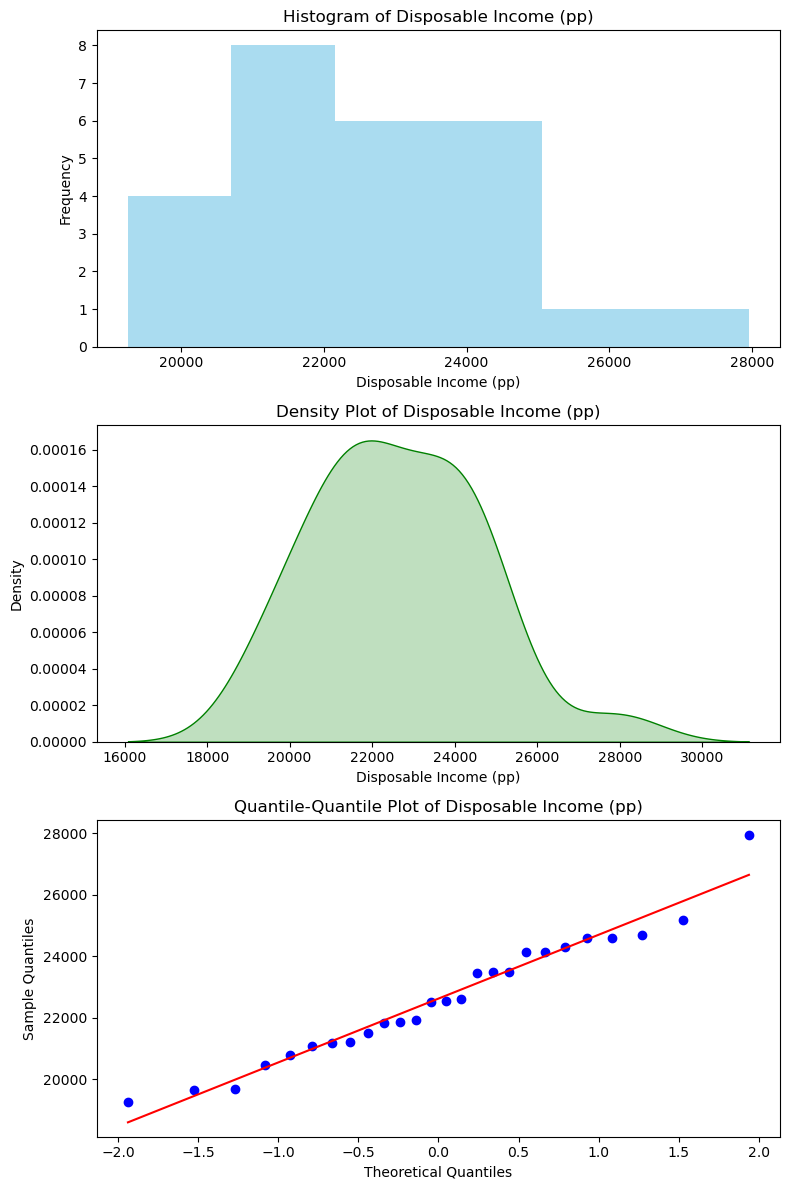

In [290]:
# Set up the figure and axis for subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Histogram with appropriate number of bins
axes[0].hist(df_vis1['Disposable Income (pp)'], bins='auto', color='skyblue', alpha=0.7)
axes[0].set_title('Histogram of Disposable Income (pp)')
axes[0].set_xlabel('Disposable Income (pp)')
axes[0].set_ylabel('Frequency')

# Density plot
sns.kdeplot(df_vis1['Disposable Income (pp)'], ax=axes[1], color='green', fill=True)
axes[1].set_title('Density Plot of Disposable Income (pp)')
axes[1].set_xlabel('Disposable Income (pp)')
axes[1].set_ylabel('Density')

# Quantile-quantile plot
stats.probplot(df_vis1['Disposable Income (pp)'], dist="norm", plot=axes[2])
axes[2].set_title('Quantile-Quantile Plot of Disposable Income (pp)')
axes[2].set_xlabel('Theoretical Quantiles')
axes[2].set_ylabel('Sample Quantiles')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [291]:
# Distribution plot 3 - Household Income (million EUR)

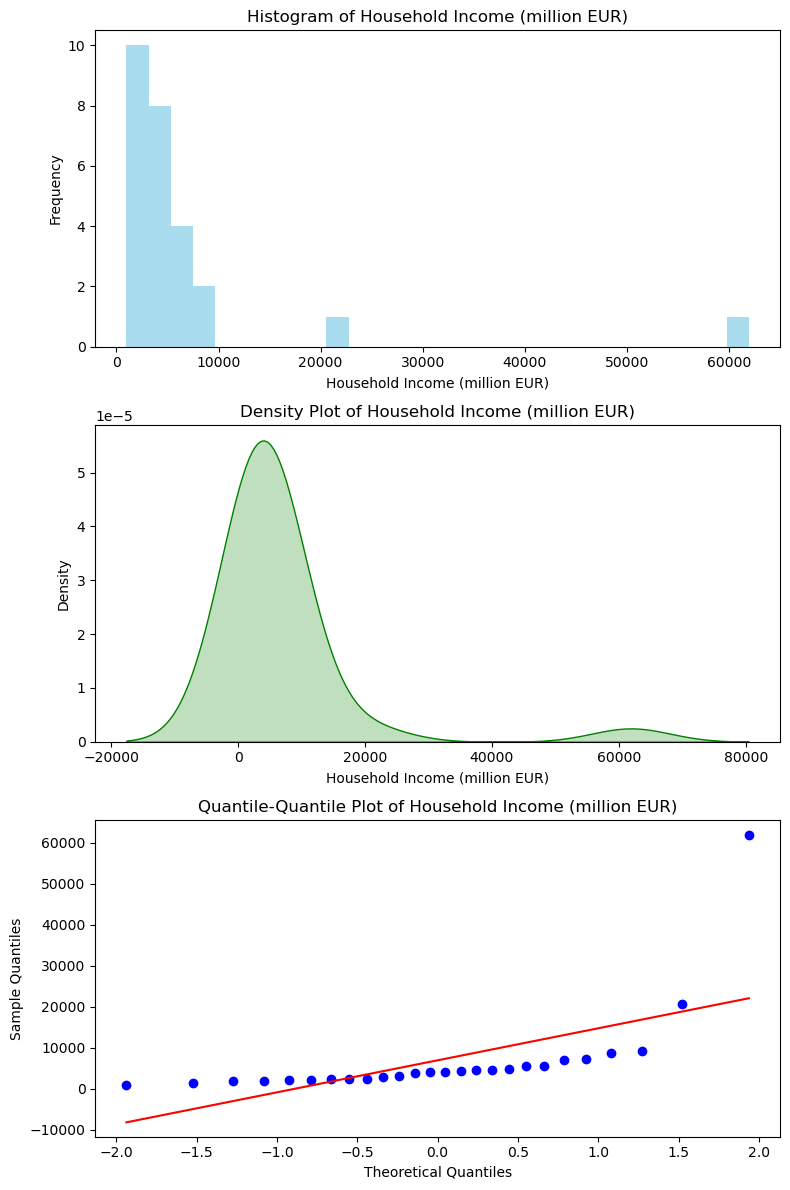

In [292]:
# Set up the figure and axis for subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Histogram with appropriate number of bins
axes[0].hist(df_vis1['Household Income (million EUR)'], bins='auto', color='skyblue', alpha=0.7)
axes[0].set_title('Histogram of Household Income (million EUR)')
axes[0].set_xlabel('Household Income (million EUR)')
axes[0].set_ylabel('Frequency')

# Density plot
sns.kdeplot(df_vis1['Household Income (million EUR)'], ax=axes[1], color='green', fill=True)
axes[1].set_title('Density Plot of Household Income (million EUR)')
axes[1].set_xlabel('Household Income (million EUR)')
axes[1].set_ylabel('Density')

# Quantile-quantile plot
stats.probplot(df_vis1['Household Income (million EUR)'], dist="norm", plot=axes[2])
axes[2].set_title('Quantile-Quantile Plot of Household Income (million EUR)')
axes[2].set_xlabel('Theoretical Quantiles')
axes[2].set_ylabel('Sample Quantiles')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [178]:
# 4. Heatmaps

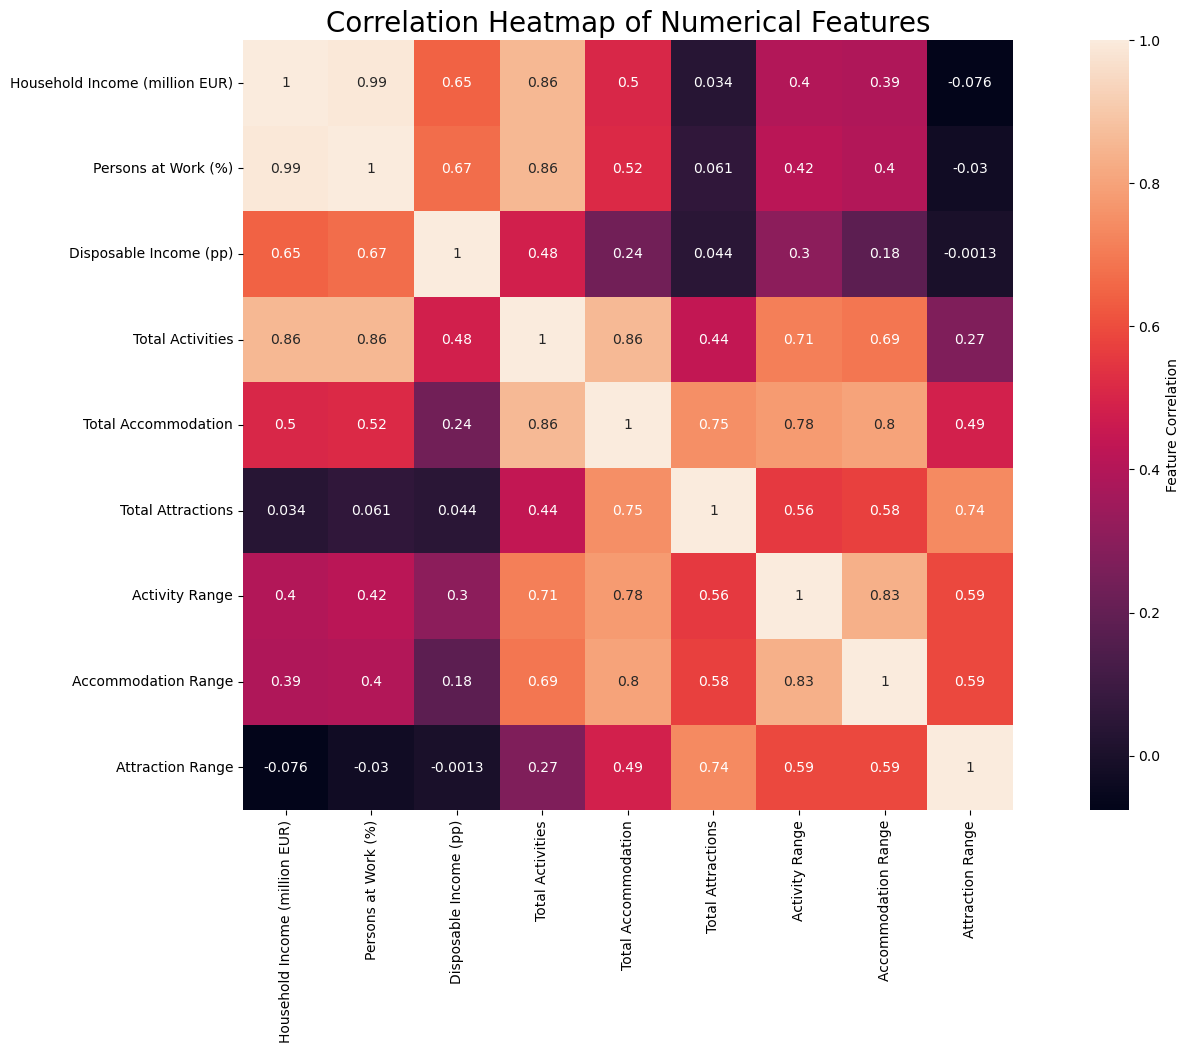

In [318]:
# Drop object feature columns so we can create a correlation heatmap
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20,10))
c = numerical_df.corr()
heatmap = sns.heatmap(c, cmap="rocket",square=0.75, annot=True, cbar_kws={'label': 'Feature Correlation'})

plt.title('Correlation Heatmap of Numerical Features', fontsize=20)

plt.show()

In [179]:
# 5. x - y Relationships plotting with bubble charts 

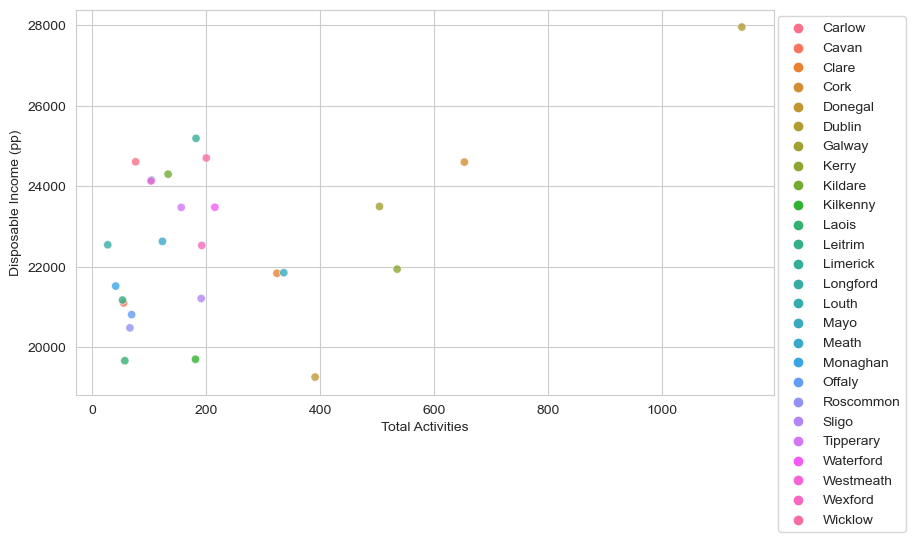

In [321]:
# Plot scatterplot 

# Set grid style
sns.set_style('whitegrid')
# Plot
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='Total Activities', y='Disposable Income (pp)', alpha=0.8, hue='County')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));

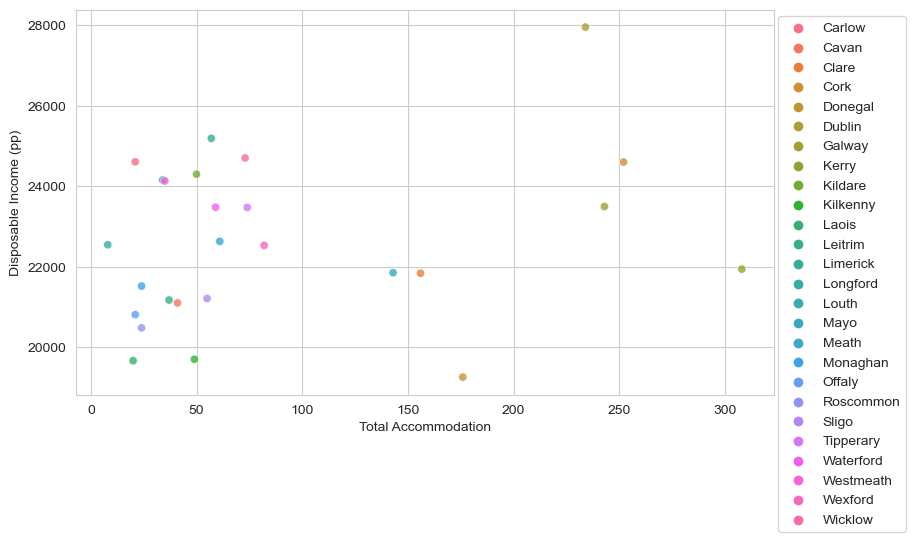

In [322]:
# Change default style
sns.set_style('whitegrid')
# Plot
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='Total Accommodation', y='Disposable Income (pp)', alpha=0.8, hue='County')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));

Text(0.5, 1.0, 'Scatter bubble plot of Total Features and Total Accomodation by County and Household Income (million EUR)')

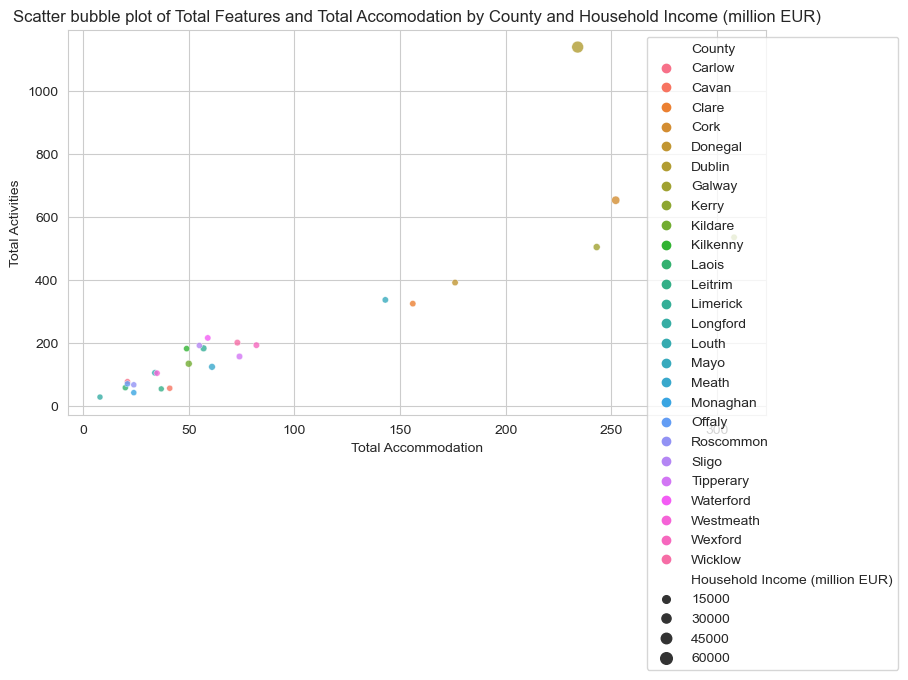

In [327]:
# Change default style
sns.set_style('whitegrid')
# Plot
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='Total Accommodation', y='Total Activities', alpha=0.8, hue='County',size='Household Income (million EUR)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));


plt.title('Scatter bubble plot of Total Features and Total Accomodation by County and Household Income (million EUR)', fontsize=12)

## Section 3: Machine Learning  

### Question - Can we try and predict the 'Total Activities' of a County by the additional features that we have selected using our three selected supervised machine learning models of Random Forest, Linear Regression and Support Vector Regression?

In [180]:
# Load in our purely numerical dataframe that has been one hot encoded and scaled -

df = pd.read_csv("ohe_scaled_df.csv")

In [181]:
df.head()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range,County_Carlow,...,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow,Dis_Income_Stand,House_Income_MinMax,Per_Wor_MinMax,Activities_MinMax,Accommodation_MinMax,Attractions_MinMax
0,2032,0,24606,76,21,4,0,0,1,1,...,0,0,0,0,0.995731,0.017263,0.000000,0.044025,0.043333,0.121212
1,2333,1,21096,55,41,3,0,1,0,0,...,0,0,0,0,-0.769051,0.022202,0.033333,0.025157,0.110000,0.090909
2,3892,1,21834,324,156,5,2,2,1,0,...,0,0,0,0,-0.397994,0.047785,0.033333,0.266846,0.493333,0.151515
3,20711,12,24599,653,252,26,2,2,2,0,...,0,0,0,0,0.992211,0.323777,0.400000,0.562444,0.813333,0.787879
4,4242,2,19252,391,176,7,2,2,1,0,...,0,0,0,0,-1.696190,0.053528,0.066667,0.327044,0.560000,0.212121


#### Part 1: Random Forest

In [182]:
# Test 1 - Without Hyperparameter Tuning 

In [183]:
# Import machine learning libraries for Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [184]:
# Select our target y variable and our independent X features

y = df['Total Activities']
X = df[['Household Income (million EUR)', 'Persons at Work (%)', 'Disposable Income (pp)', 'Total Accommodation', 'Total Attractions']]  


In [185]:
# Data Splitting for Test/Train at 20% Standard Rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# Now we can create the regressor and fit our model with the test and train data that we split above

#Create the regressor with 100 estimators
rf_regr=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets 
rf_regr.fit(X_train,y_train)

y_pred=rf_regr.predict(X_test)

In [187]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R^2) Score:", rf_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 1656.9641166666663
Mean Absolute Error (MAE): 30.048333333333332
R-squared (R^2) Score: 0.3488198310117463


In [188]:
# Test 2 - Manual Hyperparameter Testing 

#Looking at n_estimators, max_depth, min_samples_split and max_features

In [189]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters

rf_regr1 = RandomForestRegressor(n_estimators=100, 
                                 max_depth=None, 
                                 min_samples_split=2, 
                                 max_features='sqrt', 
                                 random_state=42)

#Train the model using the training sets 
rf_regr1.fit(X_train,y_train)

y_pred1=rf_regr1.predict(X_test)

In [190]:
# Model has been re-fit with test hyper parameters

rf_mse = mean_squared_error(y_test, y_pred1)
rf_mae = mean_absolute_error(y_test, y_pred1)
rf_r2 = r2_score(y_test, y_pred1)

print("Manually tuned Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R^2) Score:", rf_r2)

Manually tuned Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 2195.85765
Mean Absolute Error (MAE): 34.01833333333333
R-squared (R^2) Score: 0.13703686083577138


In [191]:
# Test 3 - Manual Hyperparameter Testing

#Looking at n_estimators, max_depth, min_samples_split and max_features

In [192]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters

rf_regr2 = RandomForestRegressor(n_estimators=200, 
                                 max_depth=10, 
                                 min_samples_split=4, 
                                 max_features='log2', 
                                 random_state=42)

#Train the model using the training sets 
rf_regr2.fit(X_train,y_train)

y_pred2=rf_regr2.predict(X_test)

In [193]:
# Model has been re-fit with test hyper parameters

rf_mse = mean_squared_error(y_test, y_pred2)
rf_mae = mean_absolute_error(y_test, y_pred2)
rf_r2 = r2_score(y_test, y_pred2)

print("Manually tuned Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R^2) Score:", rf_r2)

Manually tuned Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 1802.799200159208
Mean Absolute Error (MAE): 31.313826388888888
R-squared (R^2) Score: 0.2915072354293319


In [194]:
# Test 4 - Hyperparamter tuning with GridSearchCV

In [195]:
# Import GridSearchCV Library

from sklearn.model_selection import GridSearchCV

In [196]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with optimal hyper-paramters gained from GridSearchCV
rf_regr3 = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_regr3, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get optimal hyperparameters
best_params = grid_search.best_params_

# Train the Random Forest model with optimal hyperparameters obtained above
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=5,
                      n_estimators=300)

In [197]:
# Create new predictive class for optimal model above

y_pred3=best_rf_model.predict(X_test)


# Model has been re-fit with test hyper parameters

rf_mse = mean_squared_error(y_test, y_pred3)
rf_mae = mean_absolute_error(y_test, y_pred3)
rf_r2 = r2_score(y_test, y_pred3)

print("GridSearchCV hypertuned Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R^2) Score:", rf_r2)

GridSearchCV hypertuned Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 1224.8848313143078
Mean Absolute Error (MAE): 24.82671296296304
R-squared (R^2) Score: 0.518625235499377


In [198]:
# Test 5 - Refit model with optimal Hyper Paramters with scaled data

In [247]:
# Select our target y variable and our independent X features

y = df['Activities_MinMax']
X = df[['House_Income_MinMax', 'Per_Wor_MinMax', 'Dis_Income_Stand', 'Accommodation_MinMax', 'Attractions_MinMax']]  

In [248]:
# Data Splitting for Test/Train at 20% Standard Rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters

rf_regr5 = RandomForestRegressor(n_estimators=300, 
                                 min_samples_split=5, 
                                 max_features='sqrt',
                                 bootstrap=False,
                                 random_state=42)

#Train the model using the training sets 
rf_regr5.fit(X_train,y_train)

y_pred5=rf_regr5.predict(X_test)

In [251]:
# Model has been re-fit with test hyper parameters

rf_mse = mean_squared_error(y_test, y_pred5)
rf_mae = mean_absolute_error(y_test, y_pred5)
rf_r2 = r2_score(y_test, y_pred5)

print("GridsearchCV Params and Scaled Data Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R^2) Score:", rf_r2)

GridsearchCV Params and Scaled Data Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 0.0011126656514002602
Mean Absolute Error (MAE): 0.02291816412099436
R-squared (R^2) Score: 0.45831966084996056


#### Part 2: Linear Regression

In [199]:
# Import machine learning libraries for Linear Regression

from sklearn.linear_model import LinearRegression

In [200]:
# Test 1 - Without Hyperparameter Tuning 

In [201]:
# Select our target y variable and our independent X features

y = df['Total Activities']
X = df[['Household Income (million EUR)', 'Persons at Work (%)', 'Disposable Income (pp)', 'Total Accommodation', 'Total Attractions']]  

In [202]:
# Data Splitting for Test/Train at 20% Standard Rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Now we can create the Linear regresion model and fit our model with the test and train data that we split above

#Create the regressor 
lr_regr = LinearRegression()

#Train the model using the training sets 
lr_regr.fit(X_train, y_train)

#Create prediction class
y_pred=lr_regr.predict(X_test)

In [204]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R^2) Score:", lr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 2020.985458890587
Mean Absolute Error (MAE): 38.701103854775084
R-squared (R^2) Score: 0.20576092179314076


In [205]:
# Test 2 - Manual Hyperparameter Testing

In [206]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters

lr_regr2 = LinearRegression(fit_intercept=False,      
                            copy_X=False,        
                            n_jobs=None,         
                            positive=True)      


#Train the model using the training sets 
lr_regr2.fit(X_train, y_train)

#Create prediction class
y_pred2=lr_regr2.predict(X_test)

In [207]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

lr_mse = mean_squared_error(y_test, y_pred2)
lr_mae = mean_absolute_error(y_test, y_pred2)
lr_r2 = r2_score(y_test, y_pred2)

print("Manual tune Linear Regression Metric Scores:")
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R^2) Score:", lr_r2)

Manual tune Linear Regression Metric Scores:
Mean Squared Error (MSE): 2171.38838672388
Mean Absolute Error (MAE): 39.120898219347374
R-squared (R^2) Score: 0.14665318193463517


In [208]:
# Test 3 - Manual Hyperparameter Testing

In [209]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters

lr_regr3 = LinearRegression(fit_intercept=False,      
                            copy_X=False,        
                            n_jobs=-1,         
                            positive=True)      


#Train the model using the training sets 
lr_regr3.fit(X_train, y_train)

#Create prediction class
y_pred3=lr_regr3.predict(X_test)

In [210]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

lr_mse = mean_squared_error(y_test, y_pred3)
lr_mae = mean_absolute_error(y_test, y_pred3)
lr_r2 = r2_score(y_test, y_pred3)

print("Manual tune Linear Regression Metric Scores:")
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R^2) Score:", lr_r2)

Manual tune Linear Regression Metric Scores:
Mean Squared Error (MSE): 2171.38838672388
Mean Absolute Error (MAE): 39.120898219347374
R-squared (R^2) Score: 0.14665318193463517


In [211]:
# Test 4 - Optimal Hyper Paramters with scaled data

In [212]:
# As Linear Regression does not use hyper parameter tuning, we will test with the data that we scaled in the data prep stage


# Select our target y variable and our independent X features

y = df['Activities_MinMax']
X = df[['House_Income_MinMax', 'Per_Wor_MinMax', 'Dis_Income_Stand', 'Accommodation_MinMax', 'Attractions_MinMax']]  

In [213]:
# Data Splitting for Test/Train at 20% Standard Rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
# Now we can create the Linear regresion model and fit our model with the test and train data that we split above

#Create the regressor 
lr_regr4 = LinearRegression()

#Train the model using the training sets 
lr_regr4.fit(X_train, y_train)

#Create prediction class
y_pred4=lr_regr4.predict(X_test)

In [215]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

lr_mse = mean_squared_error(y_test, y_pred4)
lr_mae = mean_absolute_error(y_test, y_pred4)
lr_r2 = r2_score(y_test, y_pred4)

print("Scaled Linear Regression Metric Scores:")
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R^2) Score:", lr_r2)

Scaled Linear Regression Metric Scores:
Mean Squared Error (MSE): 0.0016314465884205787
Mean Absolute Error (MAE): 0.034771881271138054
R-squared (R^2) Score: 0.20576092179291017


#### Part 3: Support Vector Regression

In [216]:
# Import machine learning libraries for Support Vector Regression

from sklearn.svm import SVR

In [217]:
# Test 1 - Without Hyperparameter Tuning 

In [218]:
# Select our target y variable and our independent X features

y = df['Total Activities']
X = df[['Household Income (million EUR)', 'Persons at Work (%)', 'Disposable Income (pp)', 'Total Accommodation', 'Total Attractions']]  

In [219]:
# Data Splitting for Test/Train at 20% Standard Rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
# Now we can create the Linear regresion model and fit our model with the test and train data that we split above

#Create the regressor 
svr_regr = SVR(kernel='rbf')

#Train the model using the training sets 
svr_regr.fit(X_train, y_train)

#Create prediction class
y_pred=svr_regr.predict(X_test)

In [221]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 6153.225905142507
Mean Absolute Error (MAE): 61.980495551492915
R-squared (R^2) Score: -1.4181927927288136


In [222]:
# Test 2 - Manual Hyperparameter Testing

In [223]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr2 = SVR(kernel='rbf',C=1.0, gamma='scale', epsilon=0.5)

#Train the model using the training sets 
svr_regr2.fit(X_train, y_train)

#Create prediction class
y_pred2=svr_regr2.predict(X_test)

In [224]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred2)
svr_mae = mean_absolute_error(y_test, y_pred2)
svr_r2 = r2_score(y_test, y_pred2)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 6153.225905142507
Mean Absolute Error (MAE): 61.980495551492915
R-squared (R^2) Score: -1.4181927927288136


In [225]:
# Test 3 - Manual Hyperparameter Testing

In [226]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr3 = SVR(kernel='rbf',C=2.0, gamma='scale', epsilon=0.01)

#Train the model using the training sets 
svr_regr3.fit(X_train, y_train)

#Create prediction class
y_pred3=svr_regr3.predict(X_test)

In [227]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred3)
svr_mae = mean_absolute_error(y_test, y_pred3)
svr_r2 = r2_score(y_test, y_pred3)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 6141.98107137096
Mean Absolute Error (MAE): 61.96099110298584
R-squared (R^2) Score: -1.413773618721394


In [228]:
# Test 4 - Hyperparamter tuning with GridSearchCV

In [229]:
# Ran GridsearchCV cell below and it ran for over 8 hours without returning a result so will test selection of params manually

In [230]:
# Re-create the regressor and fit our model with the test and train data that we split above

# Update the regressor with optimal hyper-parameters gained from GridSearchCV
#svr_regr4 = SVR()

# Define the grid of hyperparameters to search
#param_grid = {
#    'kernel': ['linear', 'poly', 'rbf'],
#    'C': [0.1, 1, 10],
#    'gamma': ['scale', 'auto'],
#    'epsilon': [0.1, 0.01, 0.001]
#}

# Perform GridSearchCV
#grid_search = GridSearchCV(estimator=svr_regr, param_grid=param_grid, cv=5, scoring='r2')
#grid_search.fit(X_train, y_train)

# Get optimal hyperparameters
#best_params = grid_search.best_params_

# Train the SVR model with optimal hyperparameters obtained above
#best_svr_model = SVR(**best_params)
#best_svr_model.fit(X_train, y_train)


IndentationError: unexpected indent (1254250267.py, line 8)

In [ ]:
# Create new predictive class for optimal model above

#y_pred4=best_svr_model.predict(X_test)


# Model has been re-fit with test hyper parameters

#rf_mse = mean_squared_error(y_test, y_pred4)
#rf_mae = mean_absolute_error(y_test, y_pred4)
#rf_r2 = r2_score(y_test, y_pred4)

#print("GridSearchCV hypertuned Random Forest Regression Metric Scores:")
#print("Mean Squared Error (MSE):", rf_mse)
#print("Mean Absolute Error (MAE):", rf_mae)
#print("R-squared (R^2) Score:", rf_r2)

In [ ]:
# Additional SVR Hyper parameters 
#    'kernel': ['linear', 'poly', 'rbf'],
#    'C': [0.1, 1, 10],
#    'gamma': ['scale', 'auto'],
#    'epsilon': [0.1, 0.01, 0.001]

In [ ]:
# Test 5 - Manual HP testing from grid

In [231]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr5 = SVR(kernel='linear',C=2.0, gamma='scale', epsilon=0.01)

#Train the model using the training sets 
svr_regr5.fit(X_train, y_train)

#Create prediction class
y_pred5=svr_regr5.predict(X_test)

In [232]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred5)
svr_mae = mean_absolute_error(y_test, y_pred5)
svr_r2 = r2_score(y_test, y_pred5)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 4024.5436176190688
Mean Absolute Error (MAE): 48.186925212581876
R-squared (R^2) Score: -0.5816292982215456


In [ ]:
# Test 6 - Manual HP testing from grid

In [233]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr6 = SVR(kernel='linear',C=0.1, gamma='auto', epsilon=0.01)

#Train the model using the training sets 
svr_regr6.fit(X_train, y_train)

#Create prediction class
y_pred6=svr_regr6.predict(X_test)

In [234]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred6)
svr_mae = mean_absolute_error(y_test, y_pred6)
svr_r2 = r2_score(y_test, y_pred6)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 2152.9401468988294
Mean Absolute Error (MAE): 38.41352840512991
R-squared (R^2) Score: 0.15390326526835219


In [ ]:
# Test 7 - Manual HP testing from grid

In [245]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr7 = SVR(kernel='linear',C=0.1, gamma='auto', epsilon=0.001)

#Train the model using the training sets 
svr_regr7.fit(X_train, y_train)

#Create prediction class
y_pred7=svr_regr7.predict(X_test)

In [246]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred7)
svr_mae = mean_absolute_error(y_test, y_pred7)
svr_r2 = r2_score(y_test, y_pred7)

print("Manual SVR Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Manual SVR Regression Metric Scores:
Mean Squared Error (MSE): 2047.548276699601
Mean Absolute Error (MAE): 37.99994500974814
R-squared (R^2) Score: 0.19532184226468674


In [ ]:
# Test 8 - Manual HP testing from grid

In [237]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr8 = SVR(kernel='linear',C=1, gamma='auto', epsilon=0.001)

#Train the model using the training sets 
svr_regr8.fit(X_train, y_train)

#Create prediction class
y_pred8=svr_regr8.predict(X_test)

In [238]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred8)
svr_mae = mean_absolute_error(y_test, y_pred8)
svr_r2 = r2_score(y_test, y_pred8)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 2088.9561776505266
Mean Absolute Error (MAE): 43.14461557070414
R-squared (R^2) Score: 0.17904870534672124


In [ ]:
# Test 9 - Manual HP testing from grid

In [239]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr9 = SVR(kernel='linear',C=10, gamma='auto', epsilon=0.001)

#Train the model using the training sets 
svr_regr9.fit(X_train, y_train)

#Create prediction class
y_pred9=svr_regr9.predict(X_test)

In [240]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred9)
svr_mae = mean_absolute_error(y_test, y_pred9)
svr_r2 = r2_score(y_test, y_pred9)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 105954.91322719853
Mean Absolute Error (MAE): 253.62832942531136
R-squared (R^2) Score: -40.639850619832615


In [ ]:
# Test 10 - Manual HP testing from grid

In [241]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr10 = SVR(kernel='linear',C=0.001, gamma='auto', epsilon=0.001)

#Train the model using the training sets 
svr_regr10.fit(X_train, y_train)

#Create prediction class
y_pred10=svr_regr10.predict(X_test)

In [242]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred10)
svr_mae = mean_absolute_error(y_test, y_pred10)
svr_r2 = r2_score(y_test, y_pred10)

print("Preliminary Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

Preliminary Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 2302.0639824737623
Mean Absolute Error (MAE): 39.094434568930104
R-squared (R^2) Score: 0.0952982034730423


In [ ]:
# We have identified that the - kernal: 'poly' hyperparameter was causing the resource strain on our GridSearchCV 
# So we have removed this from the parameter grid and will run it again to test for hyper-parameter optimisation

In [243]:
# Re-create the regressor and fit our model with the test and train data that we split above

# Update the regressor with optimal hyper-parameters gained from GridSearchCV
svr_regr11 = SVR()

# Define the grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svr_regr11, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get optimal hyperparameters
best_params = grid_search.best_params_

# Train the SVR model with optimal hyperparameters obtained above
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train, y_train)


SVR(C=0.1, kernel='linear')

In [244]:
# Create new predictive class for optimal model above

y_pred11=best_svr_model.predict(X_test)


# Model has been re-fit with test hyper parameters

rf_mse = mean_squared_error(y_test, y_pred11)
rf_mae = mean_absolute_error(y_test, y_pred11)
rf_r2 = r2_score(y_test, y_pred11)

print("GridSearchCV hypertuned Random Forest Regression Metric Scores:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R^2) Score:", rf_r2)

GridSearchCV hypertuned Random Forest Regression Metric Scores:
Mean Squared Error (MSE): 2149.751382413651
Mean Absolute Error (MAE): 38.39390041182438
R-squared (R^2) Score: 0.15515643676158863


In [ ]:
# Test 12 - GirdSearchCV Params and Scaled Data 

In [252]:
# Select our target y variable and our independent X features

y = df['Activities_MinMax']
X = df[['House_Income_MinMax', 'Per_Wor_MinMax', 'Dis_Income_Stand', 'Accommodation_MinMax', 'Attractions_MinMax']]  

In [253]:
# Data Splitting for Test/Train at 20% Standard Rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
# Re-create the regressor and fit our model with the test and train data that we split above

#Update the regressor with hyper-paramters
svr_regr12 = SVR(kernel='linear',C=0.1, gamma='auto', epsilon=0.001)

#Train the model using the training sets 
svr_regr12.fit(X_train, y_train)

#Create prediction class
y_pred12=svr_regr12.predict(X_test)

In [255]:
# Now that the model has been fit with our test and train data we can evaluiate using the metrics we previously selected

svr_mse = mean_squared_error(y_test, y_pred12)
svr_mae = mean_absolute_error(y_test, y_pred12)
svr_r2 = r2_score(y_test, y_pred12)

print("GridsearchCV Params and Scaled Data SVR Regression Metric Scores:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R^2) Score:", svr_r2)

GridsearchCV Params and Scaled Data SVR Regression Metric Scores:
Mean Squared Error (MSE): 0.0025114055975151307
Mean Absolute Error (MAE): 0.04697074911980855
R-squared (R^2) Score: -0.22263056659770375
